# Description

This notebook contains the interpretation of a cluster (which features/latent variables in the original data are useful to distinguish traits in the cluster).

See section [LV analysis](#lv_analysis) below

# Modules loading

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
import re
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML

from clustering.methods import ClusterInterpreter
from data.recount2 import LVAnalysis
from data.cache import read_data
import conf

# Settings

In [3]:
# PARTITION_K = 26
# PARTITION_CLUSTER_ID = 18

# Load MultiPLIER summary

In [4]:
multiplier_model_summary = read_data(conf.MULTIPLIER["MODEL_SUMMARY_FILE"])

In [5]:
multiplier_model_summary.shape

(2157, 5)

In [6]:
multiplier_model_summary.head()

,pathway,LV index,AUC,p-value,FDR
1,KEGG_LYSINE_DEGRADATION,1,0.388059,0.866078,0.956005
2,REACTOME_MRNA_SPLICING,1,0.733057,0.000048,0.000582
3,MIPS_NOP56P_ASSOCIATED_PRE_RRNA_COMPLEX,1,0.680555,0.001628,0.011366
4,KEGG_DNA_REPLICATION,1,0.549473,0.312155,0.539951
5,PID_MYC_ACTIVPATHWAY,1,0.639303,0.021702,0.083739


# Load data

## Original data

In [7]:
INPUT_SUBSET = "z_score_std"

In [8]:
INPUT_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [9]:
input_filepath = Path(
    conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
    INPUT_SUBSET,
    f"{INPUT_SUBSET}-{INPUT_STEM}.pkl",
).resolve()
display(input_filepath)

assert input_filepath.exists(), "Input file does not exist"

input_filepath_stem = input_filepath.stem
display(input_filepath_stem)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/data_transformations/z_score_std/z_score_std-projection-smultixcan-efo_partial-mashr-zscores.pkl')

'z_score_std-projection-smultixcan-efo_partial-mashr-zscores'

In [10]:
data = pd.read_pickle(input_filepath)

In [11]:
data.shape

(3752, 987)

In [12]:
data.head()

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,...,LV978,LV979,LV980,LV981,LV982,LV983,LV984,LV985,LV986,LV987
100001_raw-Food_weight,-0.695006,1.962565,0.057683,0.878731,-0.539977,1.481272,-0.396422,1.090180,0.759223,0.931395,...,1.129784,1.752343,-1.411403,2.823863,0.931116,-1.054519,0.432982,-0.633597,0.554279,-0.642479
100002_raw-Energy,-1.528127,-0.345309,-0.148953,-0.242060,0.373427,0.791092,0.263477,0.987702,0.354391,1.416059,...,0.224604,0.769882,-0.509482,0.091153,2.286789,-1.008256,-0.029764,1.737229,-0.272107,-0.526125
100003_raw-Protein,-0.704572,-1.011299,0.671420,0.143991,0.615212,0.874212,-0.040998,0.915170,0.254369,-0.084237,...,1.003019,1.044314,-2.376108,0.004778,0.053714,-0.892447,-0.183800,1.377991,-0.278794,-0.419733
100004_raw-Fat,-0.989832,-1.875490,0.261555,-1.420719,0.366238,1.167049,0.257387,0.717674,-0.997664,0.969825,...,0.585913,0.638314,0.119139,-0.140204,1.394326,-1.173402,0.555058,1.013982,-0.544506,-0.064061
100005_raw-Carbohydrate,-0.580143,0.243335,0.158966,-0.036558,0.068176,-0.202639,1.101281,0.675227,1.463432,1.010078,...,-0.249108,-0.026814,0.232713,0.323682,1.168642,-0.282935,0.653105,1.909526,0.199997,-1.656894


# LV analysis
<a id="lv_analysis"></a>

## Top attributes

In [21]:
# # CAD from I25 (ICD10)
# lvs_list = "LV881,LV163,LV116,LV227,LV66,LV442,LV906,LV175,LV965,LV395,LV254,LV707,LV161,LV97,LV205,LV151,LV849,LV38,LV582,LV720".split(
#     ","
# )

# CAD from Nat Gen study
lvs_list = "LV38,LV881,LV116,LV163,LV74,LV1,LV509,LV824,LV840,LV189,LV604,LV854,LV583,LV170,LV608,LV926,LV420,LV272,LV60,LV905".split(
    ","
)

,pathway,LV index,AUC,p-value,FDR
199,REACTOME_APC_C_CDC20_MEDIATED_DEGRADATION_OF_M...,38,0.835096,7.676890e-07,0.000015
200,PID_FOXM1PATHWAY,38,0.827610,2.827471e-04,0.002618
201,REACTOME_DNA_REPLICATION,38,0.720906,8.831124e-08,0.000002
202,REACTOME_MITOTIC_G2_G2_M_PHASES,38,0.722758,4.495670e-04,0.003910
203,PID_AURORA_B_PATHWAY,38,0.742338,5.376717e-03,0.028157
204,PID_PLK1_PATHWAY,38,0.795189,4.470561e-04,0.003904


SRP066834, SRP050499, SRP042161, SRP057196, SRP033135, SRP028301, SRP055153, SRP059775, SRP059035, SRP030617, SRP058773, SRP055569, SRP052294, SRP060598, SRP055810, SRP028570, SRP055101, SRP011546, SRP050992, SRP062177, SRP015138, SRP014428, 

''

20003_1141150620-Treatmentmedication_code_zolmitriptan                              3.740262
6144_2-Never_eat_eggs_dairy_wheat_sugar_Dairy_products                              3.427854
22617_4135-Job_SOC_coding_Library_assistantsclerks                                  3.336711
22501_raw-Year_ended_full_time_education                                            3.198808
22601_41353316-Job_coding_library_assistantclerk_press_cuttings_clerk               3.150388
cerebral palsy                                                                      3.133688
radius fracture                                                                     3.038702
20450-Feelings_of_worthlessness_during_worst_period_of_depression                   2.992026
6138_5-Qualifications_NVQ_or_HND_or_HNC_or_equivalent                               2.939863
L12_NAILNAS-Other_and_unspecified_nail_disorders                                    2.928823
M13_SHOULDER-Shoulder_lesions                                         

''

,gene_name,LV38,gene_band
0,CENPF,5.366098,1q41
1,CCNB2,5.266376,15q22.2
2,TOP2A,4.840531,17q21.2
3,KPNA2,4.784421,17q24.2
4,NEK2,4.781691,1q32.3
5,CENPE,4.766468,4q24
6,BIRC5,4.717570,17q25.3
7,CCNB1,4.562655,5q13.2
8,KIF23,4.431166,15q23
9,UBE2C,4.402066,20q13.12


tissue       0.113836
cell type    0.022452
dtype: float64

array(['SRP066834', 'SRP057196', 'SRP011546', 'SRP014428'], dtype=object)

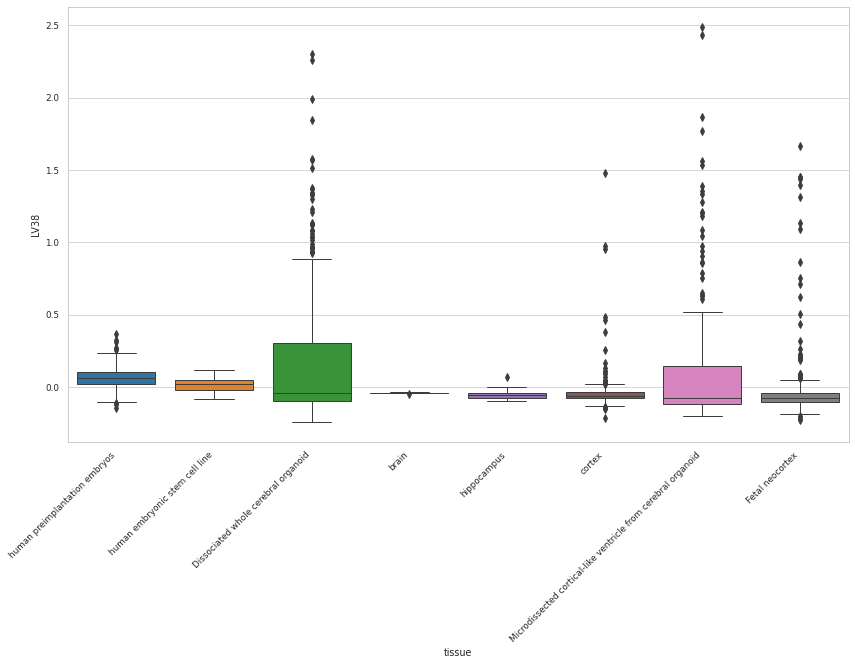

array(['SRP042161', 'SRP057196', 'SRP033135', 'SRP055153', 'SRP059035',
       'SRP055569', 'SRP055101', 'SRP011546', 'SRP050992', 'SRP062177',
       'SRP015138', 'SRP014428'], dtype=object)

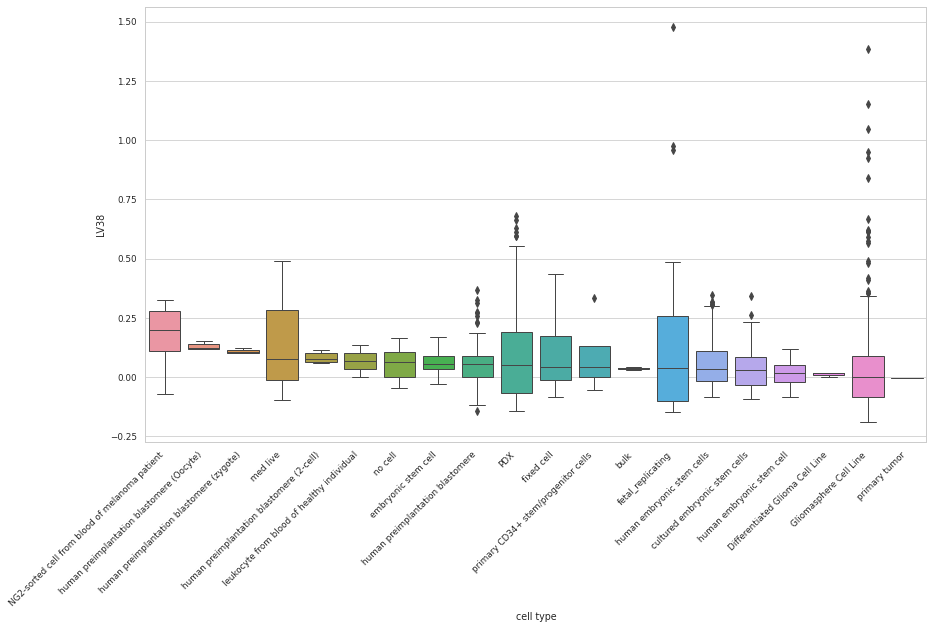

,pathway,LV index,AUC,p-value,FDR
1964,REACTOME_CELL_CYCLE,881,0.766938,4.883532e-19,8.609162e-17
1965,PID_ATR_PATHWAY,881,0.883379,4.322956e-05,5.389951e-04
1966,PID_FANCONI_PATHWAY,881,0.828724,1.587698e-04,1.638595e-03
1967,REACTOME_DNA_REPAIR,881,0.814754,2.461055e-08,6.101720e-07
1968,REACTOME_MITOTIC_M_M_G1_PHASES,881,0.785967,3.049635e-10,1.096344e-08
1969,PID_E2F_PATHWAY,881,0.659340,1.043011e-02,4.880204e-02
1970,KEGG_BASE_EXCISION_REPAIR,881,0.860503,3.154983e-04,2.847405e-03
1971,REACTOME_DNA_STRAND_ELONGATION,881,0.990600,1.647407e-06,2.820203e-05


SRP042161, SRP050499, SRP066834, SRP060416, SRP057196, SRP055569, SRP018525, SRP059035, SRP028301, SRP062773, SRP033135, SRP050440, SRP059379, SRP048603, SRP044917, SRP041102, SRP059775, SRP048604, SRP034711, SRP035312, SRP055101, SRP055153, SRP014428, SRP041255, SRP042286, SRP021509, SRP045570, SRP018838, SRP060370, SRP030617, SRP064457, SRP015138, SRP007461, SRP053186, SRP064259, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (34 != 35)
  warnings.warn(


''

30260_raw-Mean_reticulocyte_volume                         5.890030
30040_raw-Mean_corpuscular_volume                          4.745784
30270_raw-Mean_sphered_cell_volume                         4.593069
1717-Skin_colour                                           4.314437
1747_2-Hair_colour_natural_before_greying_Red              4.184030
1727-Ease_of_skin_tanning                                  4.103523
30050_raw-Mean_corpuscular_haemoglobin                     3.954470
50_raw-Standing_height                                     3.622642
23129_raw-Trunk_fatfree_mass                               3.561915
30070_raw-Red_blood_cell_erythrocyte_distribution_width    3.539809
23130_raw-Trunk_predicted_mass                             3.522084
23102_raw-Whole_body_water_mass                            3.338114
30010_raw-Red_blood_cell_erythrocyte_count                 3.292494
23101_raw-Whole_body_fatfree_mass                          3.263647
23105_raw-Basal_metabolic_rate                  

''

,gene_name,LV881,gene_band
0,MCM7,3.976067,7q22.1
1,CDC45,3.588157,22q11.21
2,PRIM1,3.445345,12q13.3
3,MCM4,3.420215,8q11.21
4,RFC4,3.372605,3q27.3
5,RFC5,3.363940,12q24.23
6,FANCI,3.339942,15q26.1
7,PCNA,3.267518,20p12.3
8,MCM6,3.155560,2q21.3
9,MCM2,3.125547,3q21.3


tissue       0.025542
cell type    0.018750
dtype: float64

array(['SRP066834', 'SRP057196', 'SRP035312', 'SRP014428', 'SRP042286'],
      dtype=object)

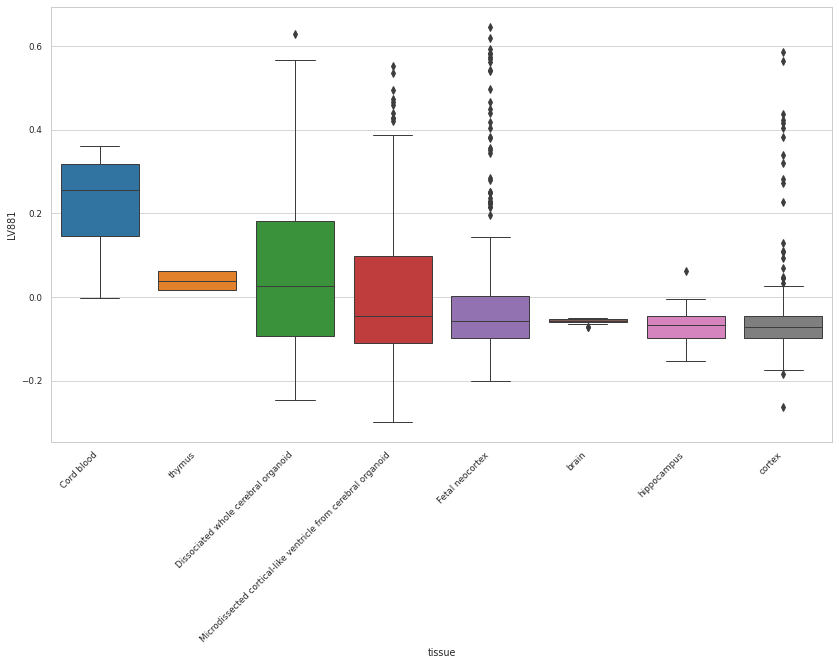

array(['SRP042161', 'SRP060416', 'SRP057196', 'SRP055569', 'SRP018525',
       'SRP059035', 'SRP033135', 'SRP059379', 'SRP044917', 'SRP041102',
       'SRP035312', 'SRP055101', 'SRP055153', 'SRP014428', 'SRP042286',
       'SRP021509', 'SRP045570', 'SRP060370', 'SRP015138', 'SRP064259'],
      dtype=object)

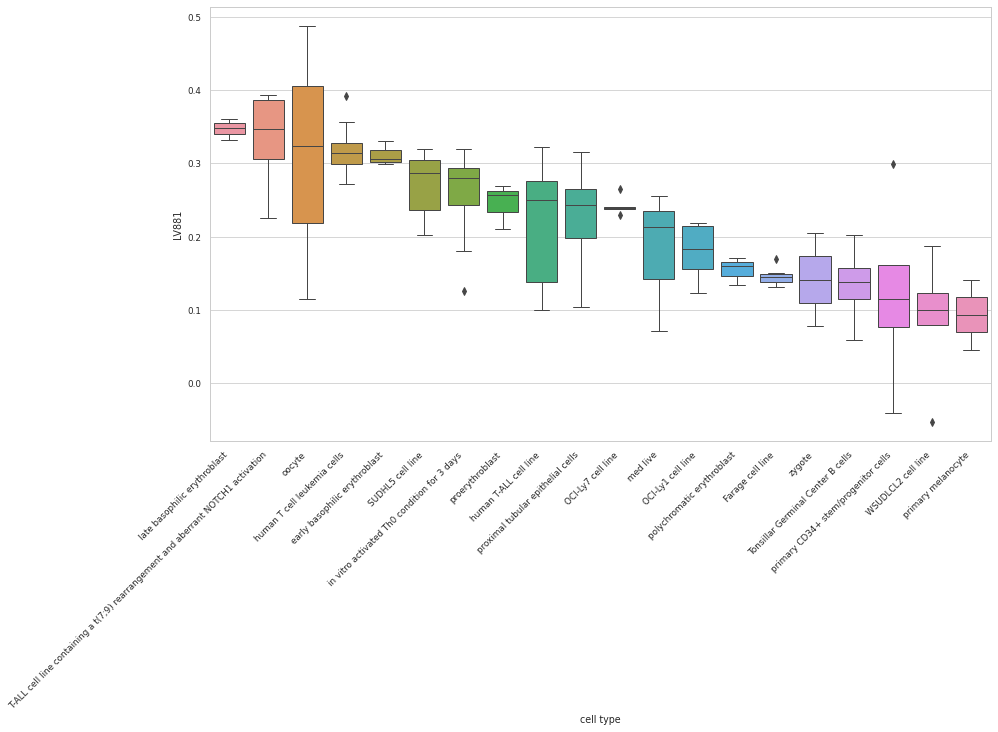

,pathway,LV index,AUC,p-value,FDR
505,IRIS_DendriticCell-LPSstimulated,116,0.645137,9.919094e-05,1.094389e-03
506,SVM Macrophages M1,116,0.922351,1.151361e-06,2.086963e-05
507,REACTOME_NEGATIVE_REGULATORS_OF_RIG_I_MDA5_SIG...,116,0.805977,2.594296e-03,1.608016e-02
508,REACTOME_CYTOKINE_SIGNALING_IN_IMMUNE_SYSTEM,116,0.670073,1.046582e-05,1.525323e-04
509,KEGG_CYTOSOLIC_DNA_SENSING_PATHWAY,116,0.842774,3.599076e-04,3.224361e-03
510,REACTOME_INTERFERON_SIGNALING,116,0.842482,8.398377e-11,3.483711e-09
511,REACTOME_INTERFERON_ALPHA_BETA_SIGNALING,116,0.937090,1.995367e-06,3.362506e-05


SRP059039, SRP045500, SRP063059, SRP045569, SRP015670, SRP059531, SRP062958, SRP039361, SRP056733, SRP060370, SRP062966, SRP045352, SRP048804, SRP032775, SRP059172, SRP050246, SRP064458, SRP033711, SRP049820, SRP023199, SRP060416, SRP005279, SRP042161, SRP059701, SRP068139, SRP051848, SRP014428, SRP063661, SRP057205, SRP041826, SRP059057, SRP064259, SRP046226, SRP044956, SRP066356, SRP048640, SRP041885, SRP045659, SRP041647, SRP045565, SRP041620, SRP053186, SRP045441, SRP022133, SRP055874, SRP029990, SRP044206, SRP065763, SRP056443, SRP041538, SRP044593, SRP019270, SRP067934, SRP059035, SRP019936, SRP054971, SRP058237, SRP051368, SRP019758, 

''

22601_24323289-Job_coding_town_planner_development_officer                                                                                                                                  4.013633
20118_13-Home_area_population_density_urban_or_rural_Scotland_Accessible_Small_Town                                                                                                         3.814243
100730-Spirits_intake                                                                                                                                                                       3.597783
22617_2432-Job_SOC_coding_Town_planners                                                                                                                                                     3.548626
20003_1141145668-Treatmentmedication_code_diovan_40mg_capsule                                                                                                                               3.533416
III_BLOOD_IMMUN

''

,gene_name,LV116,gene_band
0,IFIT1,6.937650,10q23.31
1,MX1,6.650584,21q22.3
2,IFIT2,6.479595,10q23.31
3,OAS3,6.311481,12q24.13
4,OASL,6.212510,12q24.31
5,IFIT3,5.990415,10q23.31
6,OAS2,5.873026,12q24.13
7,OAS1,5.701188,12q24.13
8,MX2,5.549364,21q22.3
9,RSAD2,5.244291,2p25.2


tissue          0.097682
cell type       0.056706
cell subtype    0.035469
tissue type     0.017317
dtype: float64

array(['SRP059039', 'SRP062966', 'SRP032775', 'SRP059172', 'SRP049820',
       'SRP005279', 'SRP014428', 'SRP044956', 'SRP041620', 'SRP022133',
       'SRP055874', 'SRP029990', 'SRP041538', 'SRP067934', 'SRP058237'],
      dtype=object)

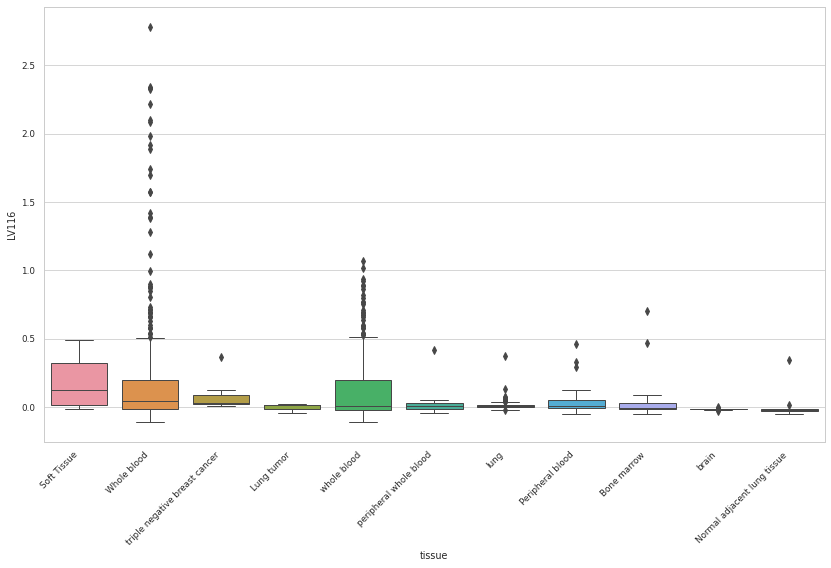

array(['SRP063059', 'SRP045569', 'SRP015670', 'SRP059531', 'SRP062958',
       'SRP039361', 'SRP060370', 'SRP045352', 'SRP048804', 'SRP050246',
       'SRP060416', 'SRP005279', 'SRP042161', 'SRP059701', 'SRP068139',
       'SRP014428', 'SRP041826', 'SRP064259', 'SRP046226', 'SRP066356',
       'SRP041885', 'SRP041647', 'SRP045441', 'SRP044206', 'SRP056443',
       'SRP044593', 'SRP059035', 'SRP054971', 'SRP058237', 'SRP019758'],
      dtype=object)

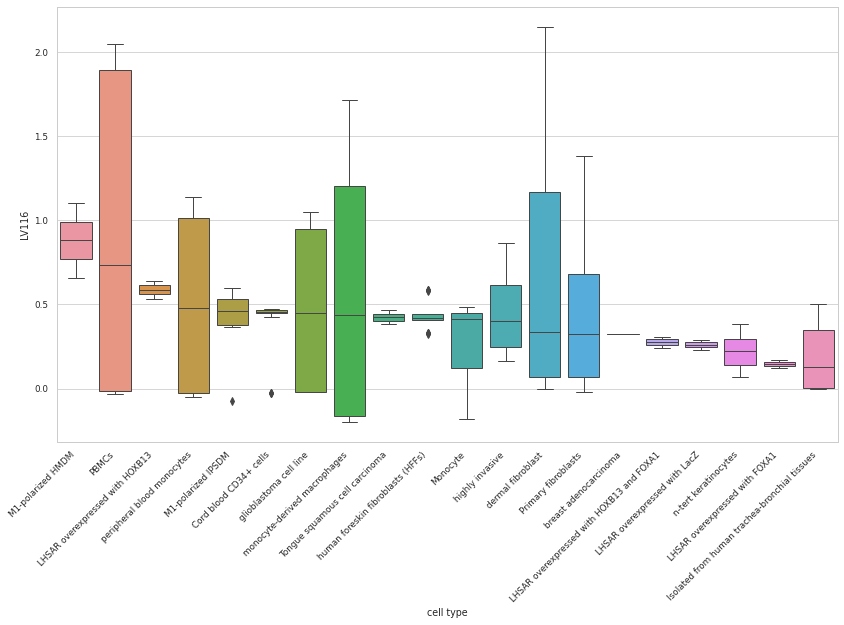

array(['SRP063661'], dtype=object)

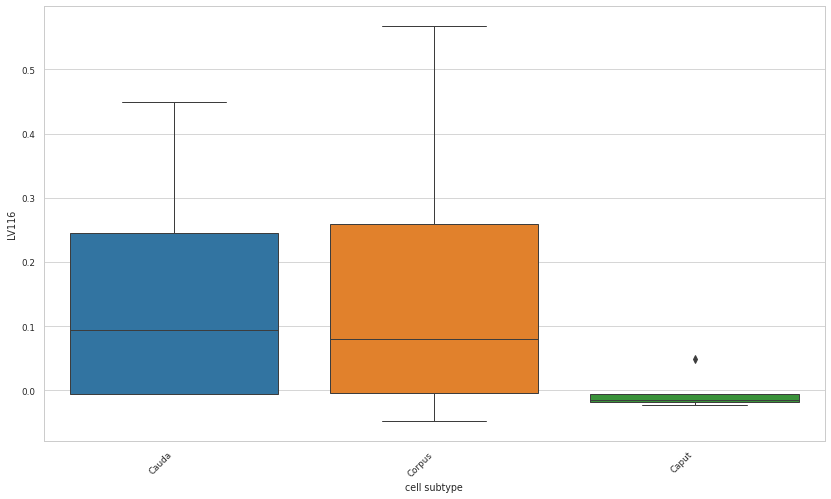

array(['SRP044956', 'SRP019936'], dtype=object)

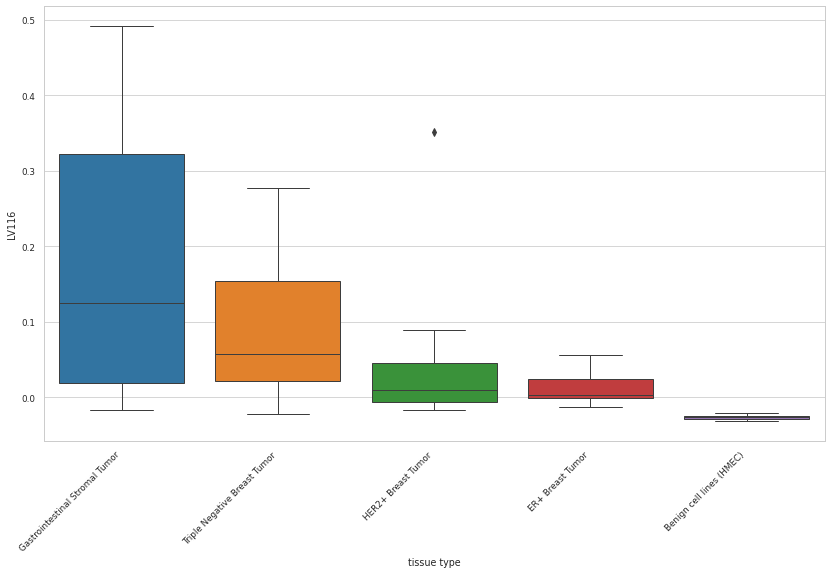

,pathway,LV index,AUC,p-value,FDR


SRP019936, SRP045639, SRP017142, SRP052706, SRP007596, SRP009276, SRP042579, SRP039348, SRP064481, SRP008554, SRP012557, SRP019994, SRP010038, SRP051674, SRP028902, SRP051765, SRP061426, SRP007461, SRP060708, SRP034953, SRP022920, SRP065202, SRP051606, SRP055153, SRP017644, SRP017972, SRP051599, SRP016790, SRP021134, SRP044013, SRP045869, SRP063620, SRP060598, SRP063948, SRP014790, SRP026537, SRP013984, SRP014320, SRP034601, SRP017789, SRP049988, SRP028118, SRP018861, SRP040243, SRP017788, SRP017411, SRP049061, SRP046254, SRP066917, SRP009266, SRP034873, SRP002915, SRP067529, SRP042620, SRP014842, SRP041718, SRP057814, SRP008218, SRP059643, SRP032165, SRP067214, SRP033711, SRP046376, SRP023270, SRP015909, SRP045711, SRP017378, SRP032942, SRP057253, SRP028190, SRP052879, SRP067836, SRP004637, SRP049068, SRP017019, SRP045695, SRP063070, SRP052740, SRP068139, SRP018218, SRP039598, SRP059066, SRP017575, SRP061380, SRP051485, SRP055475, SRP003726, SRP043510, SRP014190, SRP006912, SRP019207,

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (95 != 99)
  warnings.warn(


''

30110_raw-Platelet_distribution_width                                                  5.240518
30080_raw-Platelet_count                                                               4.235145
platelet count                                                                         4.000343
sum of eosinophil and basophil counts                                                  3.890153
alzheimer's disease                                                                    3.804511
20003_1141191044-Treatmentmedication_code_levothyroxine_sodium                         3.764629
eosinophil count                                                                       3.657890
30090_raw-Platelet_crit                                                                3.628683
22599-Number_of_jobs_held                                                              3.454838
22601_81392801-Job_coding_other_assembler_routine_operative                            3.245428
H7_RETINALDETACH-Retinal_detachments_and

''

,gene_name,LV163,gene_band
0,TNFRSF12A,3.489695,16p13.3
1,DRAP1,2.409505,11q13.1
2,PPP1R14B,2.254099,11q13.1
3,FOSL1,2.132650,11q13.1
4,GPC1,1.902764,2q37.3
5,KIFC3,1.884087,16q21
6,BCAR1,1.881304,16q23.1
7,MGAT4B,1.807862,5q35.3
8,EPHA2,1.769765,1p36.13
9,SQSTM1,1.730322,5q35.3


tissue type    0.037933
cell type      0.029207
tissue         0.024456
dtype: float64

array(['SRP019936'], dtype=object)

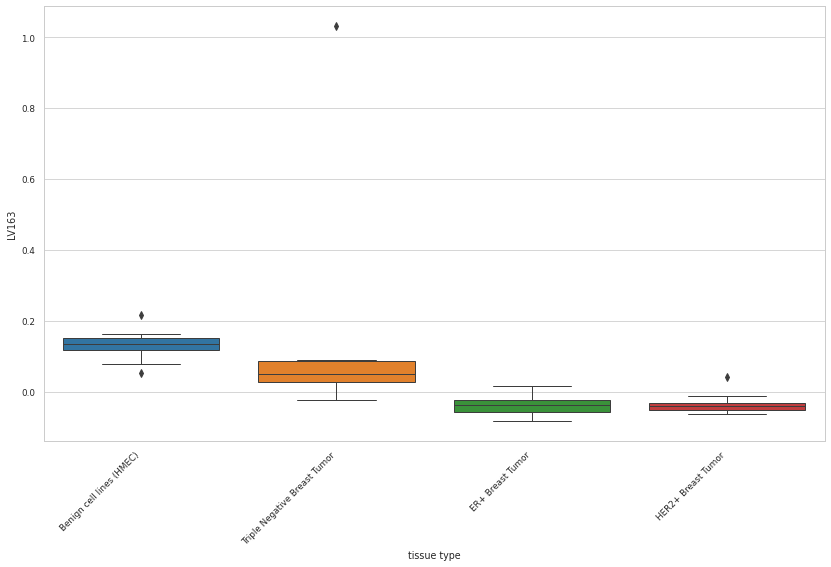

array(['SRP045639', 'SRP017142', 'SRP052706', 'SRP007596', 'SRP009276',
       'SRP042579', 'SRP008554', 'SRP010038', 'SRP051674', 'SRP028902',
       'SRP051765', 'SRP061426', 'SRP060708', 'SRP022920', 'SRP065202',
       'SRP051606', 'SRP055153', 'SRP017644', 'SRP051599', 'SRP021134',
       'SRP063620', 'SRP063948', 'SRP026537', 'SRP034601', 'SRP049988',
       'SRP028118', 'SRP017411', 'SRP049061', 'SRP046254', 'SRP066917',
       'SRP034873', 'SRP057814', 'SRP008218', 'SRP015909', 'SRP045711',
       'SRP032942', 'SRP057253', 'SRP028190', 'SRP052879', 'SRP067836',
       'SRP049068', 'SRP017019', 'SRP052740', 'SRP068139', 'SRP018218',
       'SRP059066', 'SRP061380', 'SRP003726', 'SRP006912', 'SRP057613',
       'SRP065282', 'SRP020493', 'SRP013402', 'SRP004847'], dtype=object)

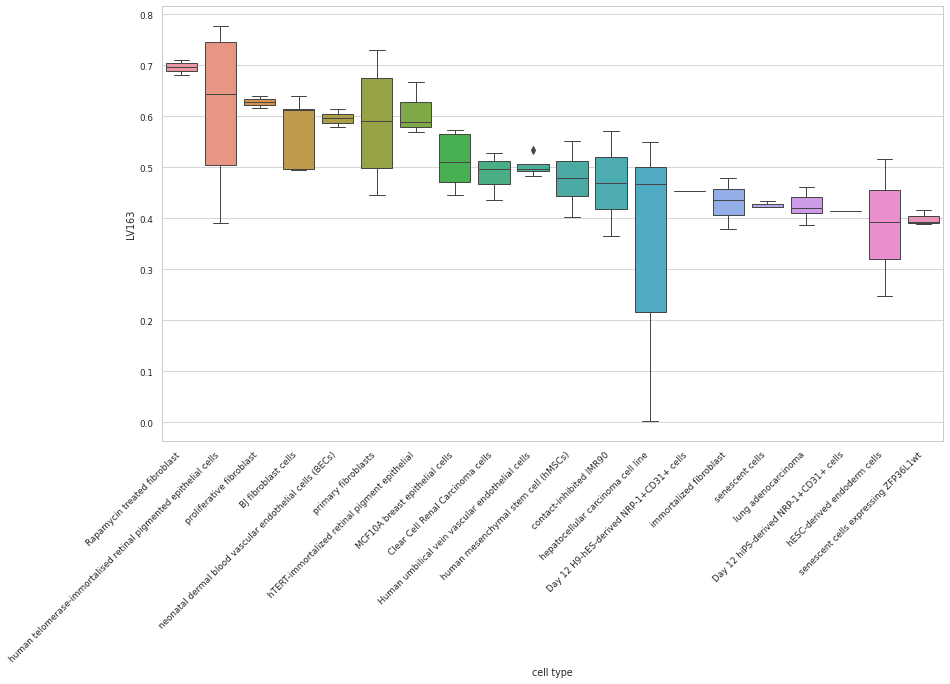

array(['SRP042579', 'SRP039348', 'SRP019994', 'SRP034953', 'SRP045869',
       'SRP040243', 'SRP042620', 'SRP008218', 'SRP032165', 'SRP004637',
       'SRP063070', 'SRP017575', 'SRP003726', 'SRP004847'], dtype=object)

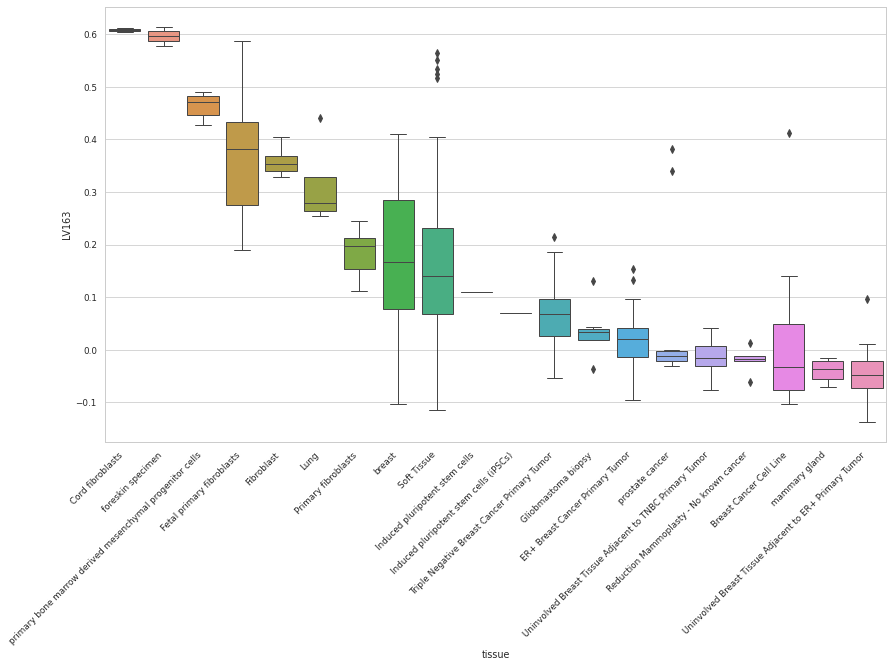

,pathway,LV index,AUC,p-value,FDR
353,REACTOME_DIABETES_PATHWAYS,74,0.873715,4.238590e-10,1.451212e-08
354,REACTOME_UNFOLDED_PROTEIN_RESPONSE,74,0.837176,3.084042e-06,5.078076e-05
355,REACTOME_ASPARAGINE_N_LINKED_GLYCOSYLATION,74,0.761173,1.448117e-04,1.516753e-03


SRP010038, SRP043166, SRP042161, SRP006970, SRP066834, SRP064323, SRP042249, SRP055569, SRP041825, SRP057196, SRP049988, SRP024274, SRP059035, SRP014428, SRP063840, SRP016059, SRP007596, SRP047082, SRP050179, SRP029262, SRP033135, SRP060416, SRP060355, SRP026042, SRP048562, SRP064464, SRP056498, SRP019241, SRP013022, SRP009266, SRP064259, SRP041751, SRP056530, SRP050499, SRP067701, SRP017435, SRP041846, SRP004637, SRP061329, SRP061682, SRP042620, SRP020491, SRP059379, SRP020493, SRP035391, SRP033393, SRP025989, SRP050892, SRP032812, SRP007461, SRP045711, SRP042616, SRP018218, SRP057205, SRP049591, SRP033078, SRP058740, SRP022166, SRP055863, SRP011895, SRP045639, SRP021509, SRP045859, SRP056220, SRP041036, SRP027383, SRP051705, SRP058783, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (66 != 68)
  warnings.warn(


''

discitis                                                                                                                    3.614737
C48-Diagnoses_main_ICD10_C48_Malignant_neoplasm_of_retroperitoneum_and_peritoneum                                           3.506715
22617_8138-Job_SOC_coding_Routine_laboratory_testers                                                                        3.402239
20110_101-Illnesses_of_mother_None_of_the_above_group_2                                                                     3.392368
20084_474-Vitamin_andor_mineral_supplement_use_Evening_primrose_                                                            3.352129
22617_6121-Job_SOC_coding_Nursery_nurses                                                                                    3.240579
20003_1140888560-Treatmentmedication_code_perindopril                                                                       3.203299
20003_1140865354-Treatmentmedication_code_gaviscon_liquid            

''

,gene_name,LV74,gene_band
0,HSPA5,4.958830,9q33.3
1,HYOU1,3.826483,11q23.3
2,HSP90B1,3.751964,12q23.3
3,DNAJB9,3.109571,7q31.1
4,HERPUD1,2.736264,16q13
5,DDIT3,2.712314,12q13.3
6,DNAJC3,2.666935,13q32.1
7,PDIA6,2.530785,2p25.1
8,SEC31A,2.463485,4q21.22
9,SSR1,2.223638,6p24.3


cell type    0.014749
tissue       0.014416
dtype: float64

array(['SRP010038', 'SRP042161', 'SRP006970', 'SRP042249', 'SRP055569',
       'SRP041825', 'SRP057196', 'SRP049988', 'SRP024274', 'SRP059035',
       'SRP014428', 'SRP063840', 'SRP016059', 'SRP007596', 'SRP047082',
       'SRP050179', 'SRP033135', 'SRP060416', 'SRP056498', 'SRP019241',
       'SRP013022', 'SRP064259', 'SRP041751', 'SRP067701', 'SRP041846',
       'SRP061682', 'SRP020491', 'SRP059379', 'SRP020493', 'SRP033393',
       'SRP045711', 'SRP018218', 'SRP033078', 'SRP045639', 'SRP021509',
       'SRP045859', 'SRP056220'], dtype=object)

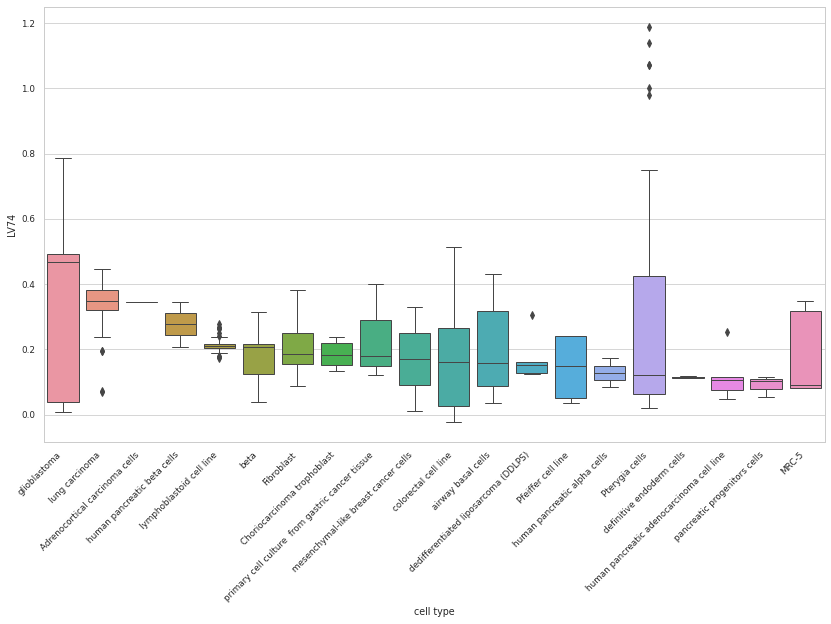

array(['SRP043166', 'SRP066834', 'SRP064323', 'SRP057196', 'SRP014428',
       'SRP016059', 'SRP029262', 'SRP060355', 'SRP026042', 'SRP004637',
       'SRP042620', 'SRP032812', 'SRP058740', 'SRP055863'], dtype=object)

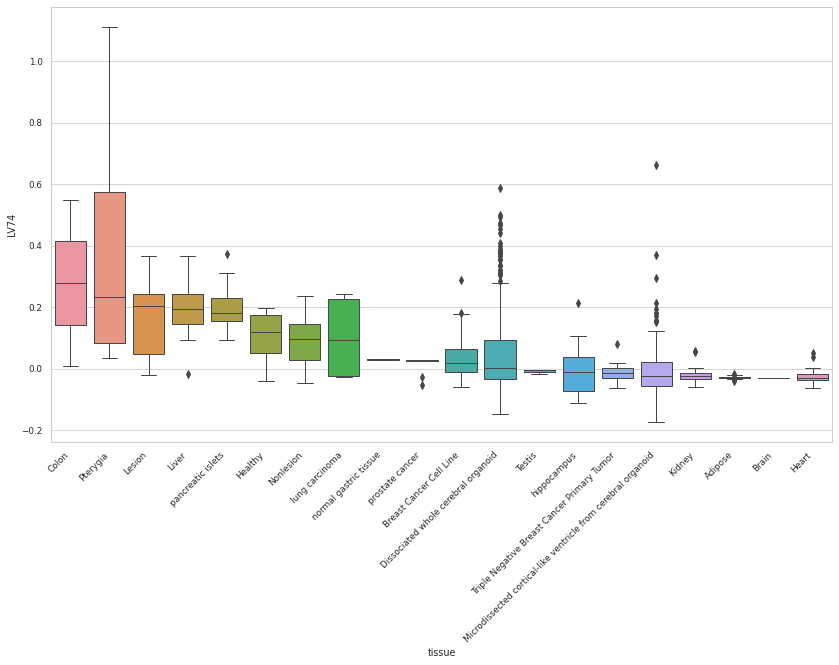

,pathway,LV index,AUC,p-value,FDR
2,REACTOME_MRNA_SPLICING,1,0.733057,0.000048,0.000582
3,MIPS_NOP56P_ASSOCIATED_PRE_RRNA_COMPLEX,1,0.680555,0.001628,0.011366
8,REACTOME_MITOTIC_G1_G1_S_PHASES,1,0.686170,0.000252,0.002392


SRP019936, SRP058435, SRP015715, SRP007461, SRP041263, SRP064481, SRP042620, SRP026537, SRP044611, SRP014591, SRP014320, SRP017644, SRP034601, SRP059266, SRP021214, SRP004637, SRP061689, SRP055569, SRP014790, SRP023111, SRP033119, SRP015964, SRP018861, SRP043593, SRP067836, SRP051736, SRP060708, SRP065202, SRP036133, SRP059066, SRP049510, SRP005281, SRP050440, SRP046271, SRP061840, SRP048536, SRP020556, SRP012099, SRP060359, SRP019222, SRP026084, SRP041102, SRP032754, SRP028902, SRP058383, SRP042297, SRP045639, SRP007525, SRP044013, SRP064561, SRP063948, SRP060650, SRP008331, SRP008930, SRP060661, SRP003672, SRP002789, SRP009790, SRP057745, SRP007506, SRP001540, SRP017019, SRP063339, SRP049391, SRP014857, SRP010280, SRP050147, SRP013463, SRP058300, SRP019250, SRP032367, SRP022876, SRP033057, SRP002079, SRP023270, SRP041036, SRP040327, SRP046741, SRP058571, SRP029739, SRP012557, SRP028118, SRP039348, SRP064562, SRP012062, SRP035312, SRP034711, SRP007403, SRP057804, SRP060637, SRP034873,

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (102 != 105)
  warnings.warn(


''

1747_2-Hair_colour_natural_before_greying_Red                  7.043617
1747_4-Hair_colour_natural_before_greying_Dark_brown           4.975703
30010_raw-Red_blood_cell_erythrocyte_count                     4.626234
psoriasis                                                      4.504572
30270_raw-Mean_sphered_cell_volume                             4.304978
30260_raw-Mean_reticulocyte_volume                             3.961469
erythrocyte count                                              3.914074
30150-Eosinophill_count                                        3.819251
30040_raw-Mean_corpuscular_volume                              3.755878
30050_raw-Mean_corpuscular_haemoglobin                         3.752588
1747_5-Hair_colour_natural_before_greying_Black                3.504448
1747_1-Hair_colour_natural_before_greying_Blonde               3.493887
1747_3-Hair_colour_natural_before_greying_Light_brown          3.423996
20110_10-Illnesses_of_mother_Alzheimers_diseasedementia        3

''

,gene_name,LV1,gene_band
0,POLD1,2.989508,19q13.33
1,TRIM28,2.967235,19q13.43
2,TOMM40,2.941369,19q13.32
3,PKMYT1,2.810091,16p13.3
4,CDT1,2.776054,16q24.3
5,VARS,2.533207,6p21.33
6,H2AFX,2.502205,11q23.3
7,KHSRP,2.499231,19p13.3
8,MCM2,2.493689,3q21.3
9,TONSL,2.466507,8q24.3


tissue type    0.061764
cell type      0.056081
tissue         0.025875
dtype: float64

array(['SRP019936'], dtype=object)

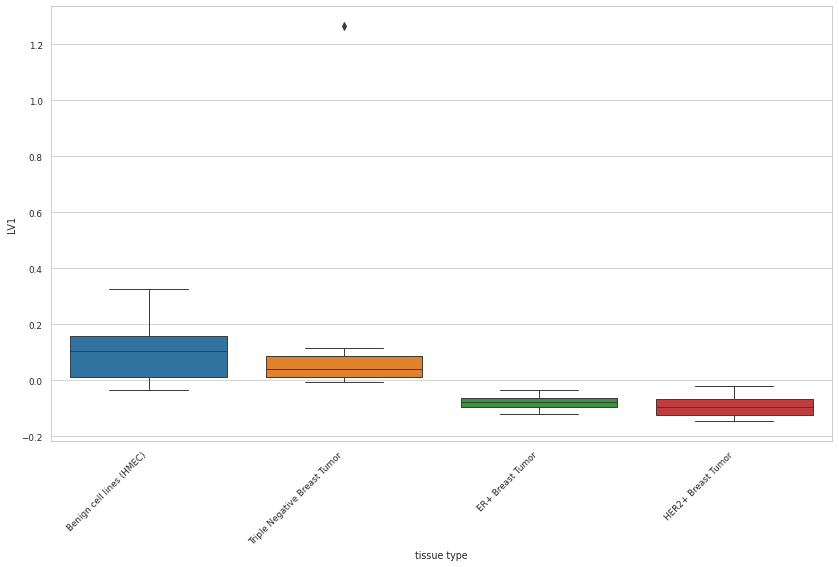

array(['SRP058435', 'SRP015715', 'SRP026537', 'SRP044611', 'SRP017644',
       'SRP034601', 'SRP021214', 'SRP061689', 'SRP055569', 'SRP067836',
       'SRP051736', 'SRP060708', 'SRP065202', 'SRP036133', 'SRP059066',
       'SRP020556', 'SRP041102', 'SRP028902', 'SRP058383', 'SRP042297',
       'SRP045639', 'SRP064561', 'SRP063948', 'SRP060650', 'SRP002789',
       'SRP017019', 'SRP050147', 'SRP019250', 'SRP032367', 'SRP022876',
       'SRP033057', 'SRP058571', 'SRP028118', 'SRP064562', 'SRP012062',
       'SRP035312', 'SRP057804', 'SRP034873', 'SRP015640', 'SRP010430',
       'SRP010678', 'SRP016568', 'SRP015819', 'SRP003637', 'SRP050146'],
      dtype=object)

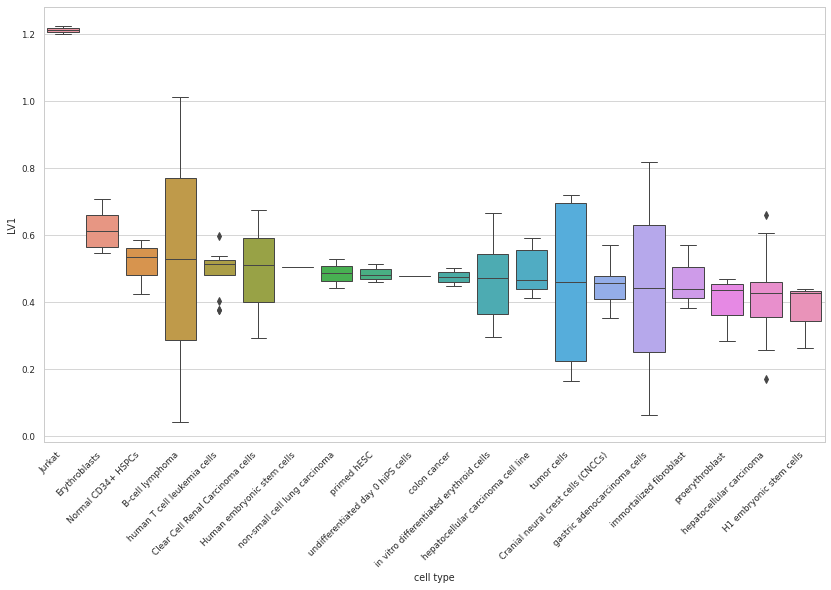

array(['SRP042620', 'SRP004637', 'SRP051736', 'SRP058383', 'SRP039348',
       'SRP035312', 'SRP034953'], dtype=object)

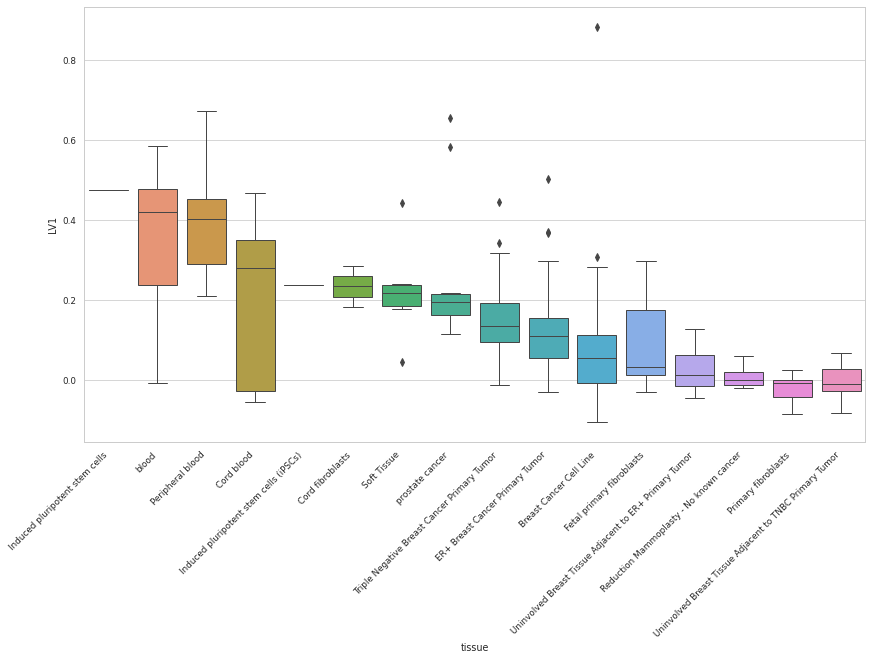

,pathway,LV index,AUC,p-value,FDR


SRP009266, SRP013725, SRP006575, SRP023262, SRP009862, SRP065202, SRP055569, SRP035391, SRP043962, SRP061241, SRP002487, SRP007596, SRP042579, SRP050365, SRP045869, SRP033119, SRP002915, SRP028815, SRP026315, SRP005177, SRP012056, SRP044611, SRP067214, SRP026537, SRP033369, SRP012461, SRP019936, SRP019994, SRP046749, SRP033135, SRP014739, SRP049500, SRP007461, SRP057196, SRP010350, SRP007359, SRP039348, SRP017644, SRP024268, SRP052950, SRP005279, SRP051102, SRP065559, SRP004637, SRP040136, SRP048536, SRP006475, SRP009276, SRP058120, SRP004847, SRP033276, SRP060416, SRP042161, SRP014320, SRP041210, SRP020493, SRP051599, SRP045905, SRP055153, SRP049988, SRP003611, SRP036821, SRP042616, SRP043378, SRP051765, SRP014790, SRP017789, SRP032510, SRP050036, SRP017411, SRP064464, SRP056696, SRP060661, SRP003726, SRP022920, SRP013984, SRP055810, SRP063620, SRP045898, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (75 != 79)
  warnings.warn(


''

20003_1140922174-Treatmentmedication_code_alendronate_sodium                                 4.498028
5265_raw-Corneal_resistance_factor_left                                                      3.876761
2492-Taking_other_prescription_medications                                                   3.497550
20003_1140910640-Treatmentmedication_code_luteine                                            3.092832
6160_100-Leisuresocial_activities_None_of_the_above                                          3.010461
5257_raw-Corneal_resistance_factor_right                                                     2.875965
1289-Cooked_vegetable_intake                                                                 2.873682
2634-Duration_of_heavy_DIY                                                                   2.872426
H8_BPV-Benign_paroxysmal_vertigo                                                             2.836932
100003_raw-Protein                                                                

''

,gene_name,LV509,gene_band
0,ESRRA,3.674877,11q13.1
1,ADRM1,3.380042,20q13.33
2,KRT18,2.974728,12q13.13
3,HSPB1,2.921798,7q11.23
4,COX17,2.580933,3q13.33
5,H2AFJ,2.521385,12p12.3
6,PTGES2,2.513135,9q34.11
7,MXD4,2.376260,4p16.3
8,RPL36AL,2.301853,14q21.3
9,PPP1CA,2.269525,11q13.2


tissue            0.007826
cell type         0.004208
tissue type       0.003955
tissue subtype    0.003260
cell line/type    0.002409
dtype: float64

array(['SRP006575', 'SRP023262', 'SRP061241', 'SRP042579', 'SRP045869',
       'SRP019994', 'SRP014739', 'SRP057196', 'SRP007359', 'SRP039348',
       'SRP024268', 'SRP052950', 'SRP005279', 'SRP065559', 'SRP004637',
       'SRP004847', 'SRP033276', 'SRP036821', 'SRP056696', 'SRP003726',
       'SRP045898'], dtype=object)

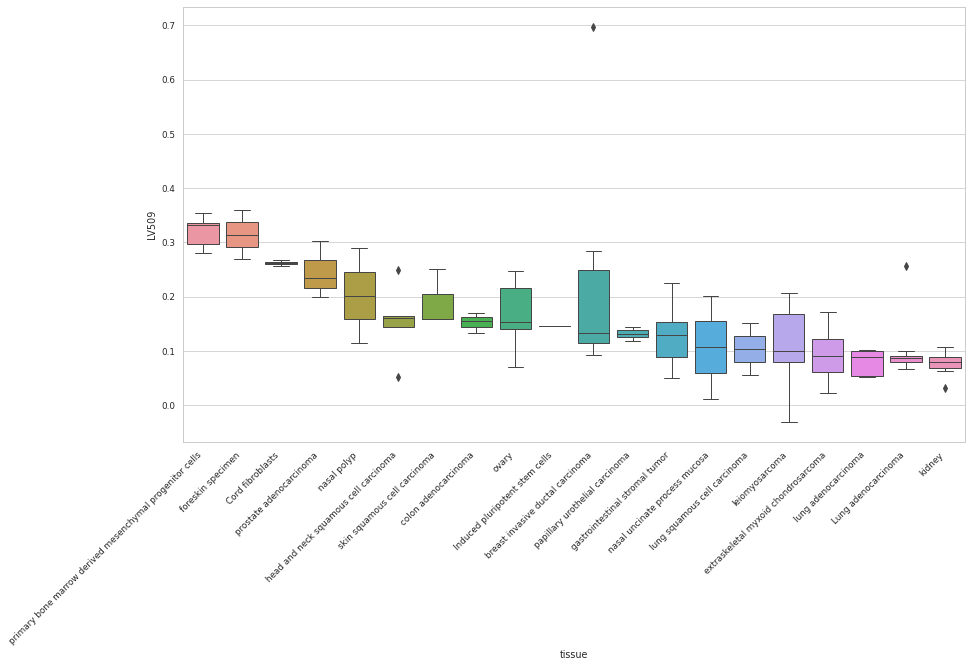

array(['SRP006575', 'SRP065202', 'SRP055569', 'SRP007596', 'SRP042579',
       'SRP026315', 'SRP044611', 'SRP026537', 'SRP012461', 'SRP046749',
       'SRP033135', 'SRP049500', 'SRP057196', 'SRP017644', 'SRP005279',
       'SRP051102', 'SRP040136', 'SRP009276', 'SRP004847', 'SRP060416',
       'SRP042161', 'SRP041210', 'SRP020493', 'SRP051599', 'SRP055153',
       'SRP049988', 'SRP051765', 'SRP017411', 'SRP003726', 'SRP022920',
       'SRP063620'], dtype=object)

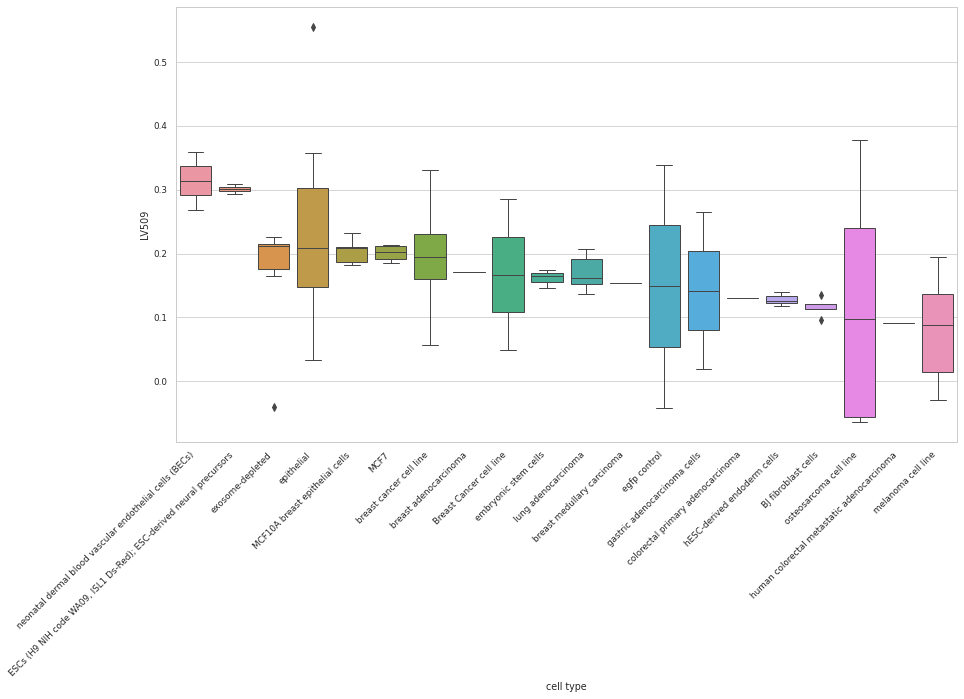

array(['SRP019936'], dtype=object)

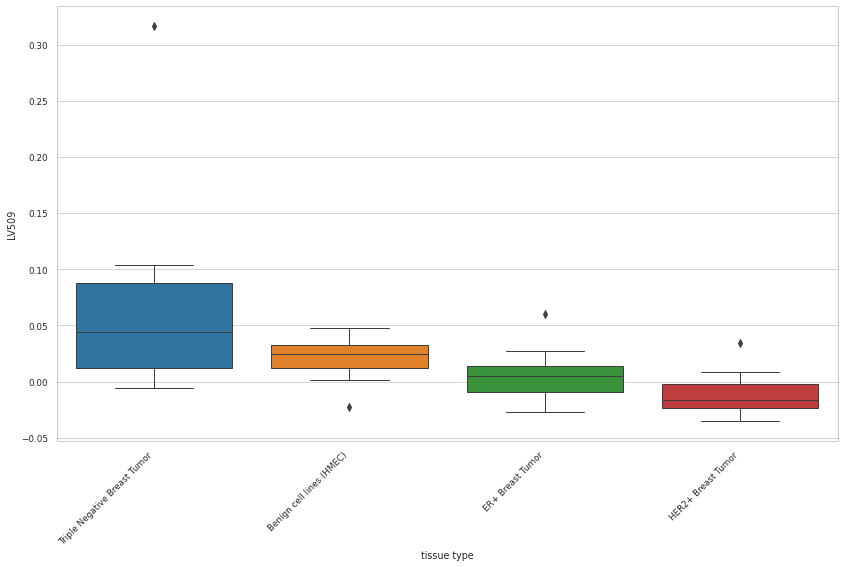

array(['SRP036821'], dtype=object)

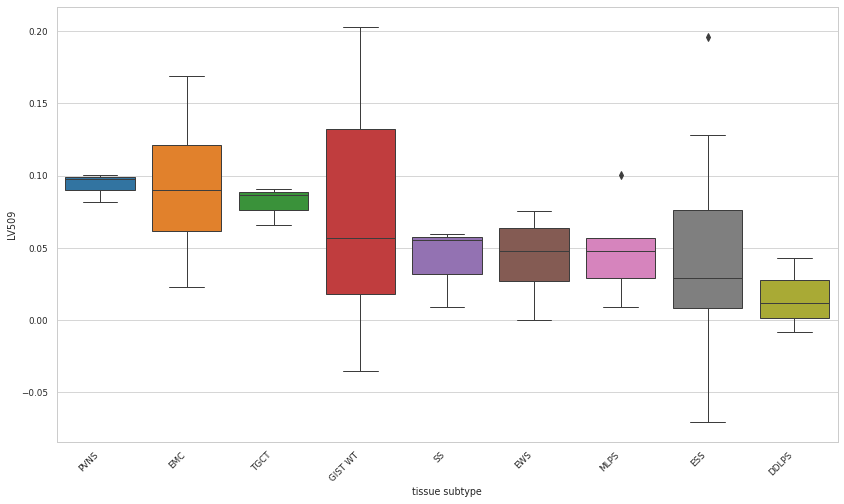

array(['SRP058120'], dtype=object)

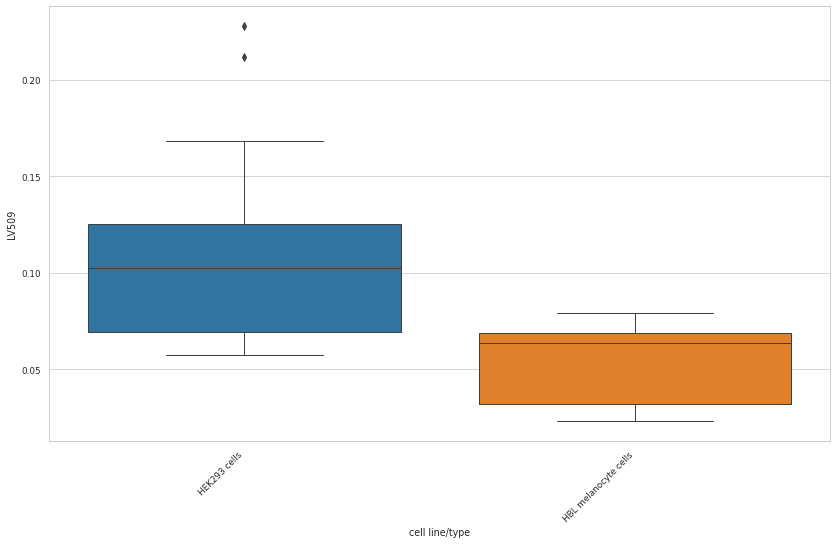

,pathway,LV index,AUC,p-value,FDR


SRP057205, SRP055569, SRP060416, SRP042161, SRP057196, SRP066834, SRP007498, SRP050499, SRP007947, SRP033135, SRP024268, SRP031507, SRP059379, SRP064464, SRP058773, SRP030617, SRP009862, SRP049340, SRP058351, SRP018719, SRP008218, SRP042119, SRP059279, SRP040145, SRP003726, SRP030475, SRP050992, SRP049391, SRP050147, SRP045294, SRP005129, SRP056076, SRP064259, SRP004847, SRP026537, SRP019241, SRP051472, SRP041263, SRP063867, SRP044611, SRP031858, SRP041008, SRP032928, SRP026033, SRP011378, SRP003021, SRP014320, SRP049475, SRP061840, SRP050365, SRP011546, SRP014626, SRP056084, SRP049593, SRP018861, SRP026084, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (54 != 56)
  warnings.warn(


''

K11_CHOLANGI-Cholangitis_sclerosing                                                 3.704350
M13_OSTEOPOROSIS-Osteoporosis                                                       3.570699
1289-Cooked_vegetable_intake                                                        3.295858
C_OTHER_SKIN-Other_malignant_neoplasms_of_skin                                      3.073938
20507-Recent_feelings_of_inadequacy                                                 3.051754
6149_3-Mouthteeth_dental_problems_Bleeding_gums                                     3.051110
20001_99999-Cancer_code_selfreported_unclassifiable                                 3.024571
eustachian tube disease                                                             2.994673
manic episode measurement                                                           2.971082
22617_3232-Job_SOC_coding_Housing_and_welfare_officers                              2.961619
20084_468-Vitamin_andor_mineral_supplement_use_Multivitamin_          

''

,gene_name,LV824,gene_band
0,WWOX,5.845011,16q23.1
1,HK1,3.234558,10q22.1
2,GGCX,2.505320,2p11.2
3,KLC1,2.448104,14q32.33
4,RAB7A,2.174348,3q21.3
5,KDM1A,1.937687,1p36.12
6,DLG3,1.852600,NaN
7,SLC5A6,1.836578,2p23.3
8,SND1,1.747693,7q32.1
9,CSNK2A1,1.632553,20p13


cell type    0.003603
tissue       0.003147
dtype: float64

array(['SRP055569', 'SRP060416', 'SRP042161', 'SRP057196', 'SRP007947',
       'SRP033135', 'SRP031507', 'SRP059379', 'SRP008218', 'SRP042119',
       'SRP059279', 'SRP040145', 'SRP003726', 'SRP050992', 'SRP050147',
       'SRP045294', 'SRP005129', 'SRP056076', 'SRP064259', 'SRP004847',
       'SRP026537', 'SRP019241', 'SRP063867', 'SRP044611', 'SRP031858',
       'SRP041008', 'SRP032928', 'SRP026033', 'SRP003021', 'SRP011546',
       'SRP014626', 'SRP056084'], dtype=object)

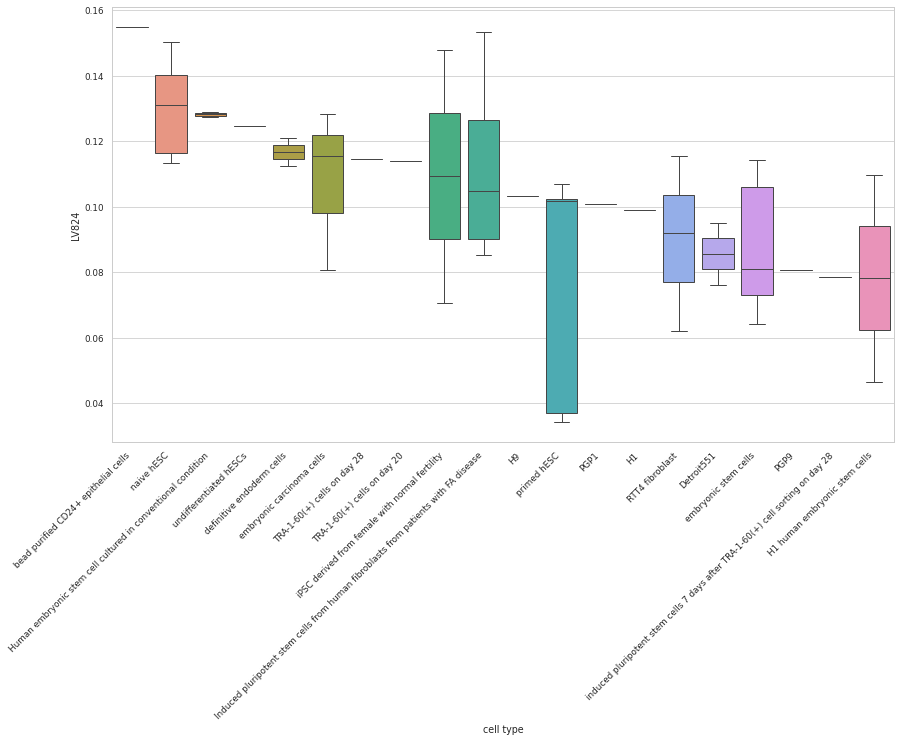

array(['SRP057196', 'SRP066834', 'SRP024268', 'SRP058351', 'SRP008218',
       'SRP003726', 'SRP004847', 'SRP011546'], dtype=object)

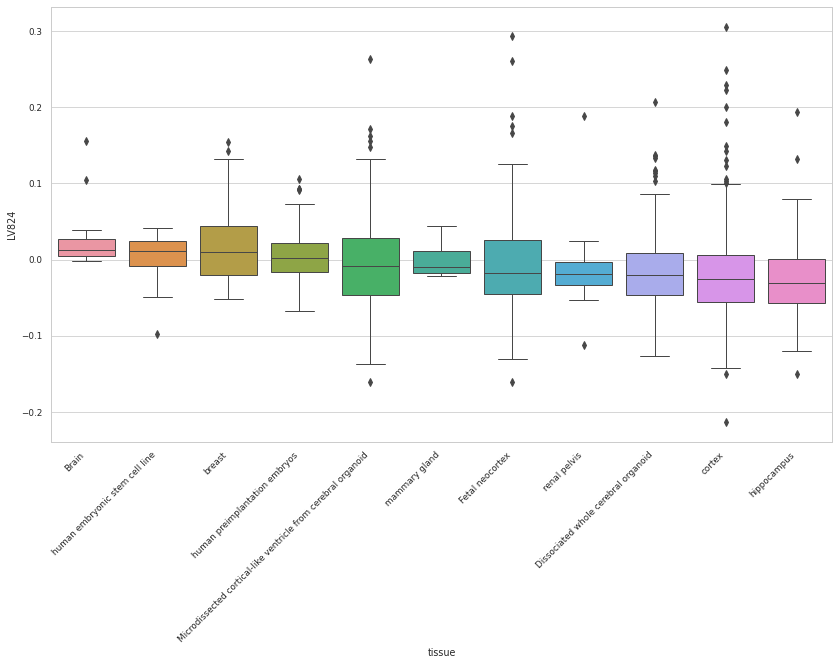

,pathway,LV index,AUC,p-value,FDR
1879,REACTOME_MITOCHONDRIAL_PROTEIN_IMPORT,840,0.850471,0.000041,0.000520
1881,MIPS_NOP56P_ASSOCIATED_PRE_RRNA_COMPLEX,840,0.739287,0.000047,0.000578
1884,REACTOME_TRNA_AMINOACYLATION,840,0.733583,0.006690,0.033956
1885,MIPS_SPLICEOSOME,840,0.745691,0.000001,0.000024
1886,MIPS_39S_RIBOSOMAL_SUBUNIT_MITOCHONDRIAL,840,0.820899,0.000156,0.001621


SRP043417, SRP028301, SRP059775, SRP062177, SRP012056, SRP033119, SRP040278, SRP058300, SRP034543, SRP056084, SRP038695, SRP058841, SRP059948, SRP042161, SRP009266, SRP006475, SRP045501, SRP033369, SRP058773, SRP018861, SRP041036, SRP055810, SRP055569, SRP029245, SRP018719, SRP015964, SRP014867, SRP010280, SRP048536, SRP002605, SRP053402, SRP063339, SRP019250, SRP007461, SRP044653, SRP046749, SRP039397, SRP052950, SRP056036, SRP043962, SRP061539, SRP019989, SRP064481, SRP045481, SRP028887, SRP013725, SRP009861, SRP041263, SRP058087, SRP019241, SRP050055, SRP011546, SRP039348, SRP010430, SRP058191, SRP049510, SRP056200, SRP060637, SRP021214, SRP060416, SRP041656, SRP064464, SRP041396, SRP053052, SRP029515, SRP064317, SRP001349, SRP041130, SRP017644, SRP059266, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (68 != 70)
  warnings.warn(


''

1488_raw-Tea_intake                                                                                                 4.570165
30140_raw-Neutrophill_count                                                                                         3.520659
XVII_MALFORMAT_ABNORMAL-Congenital_malformations_deformations_and_chromosomal_abnormalities                         3.181926
2887-Number_of_cigarettes_previously_smoked_daily                                                                   3.155120
22617_5113-Job_SOC_coding_Gardeners_and_groundsmengroundswomen                                                      3.153329
neutrophil count                                                                                                    3.094930
20003_2038459704-Treatmentmedication_code_carbamazepine                                                             3.035843
22601_51132488-Job_coding_gardener_groundsmangroundswoman_park_keeper_landscape_gardener_greenkeeper_turf_cutter    3.002729


''

,gene_name,LV840,gene_band
0,SNRPB,2.563358,20p13
1,EIF4A3,2.223462,17q25.3
2,GEMIN4,2.219158,17p13.3
3,MRPL37,2.028093,1p32.3
4,MRPL12,2.011655,17q25.3
5,PRMT5,1.875782,14q11.2
6,WDR77,1.821151,1p13.2
7,MRPS2,1.808959,9q34.3
8,C1QBP,1.781616,17p13.2
9,PSME3,1.778598,NaN


cell type    0.014267
tissue       0.011508
dtype: float64

array(['SRP062177', 'SRP040278', 'SRP034543', 'SRP056084', 'SRP042161',
       'SRP055569', 'SRP019250', 'SRP046749', 'SRP061539', 'SRP058087',
       'SRP019241', 'SRP011546', 'SRP010430', 'SRP056200', 'SRP021214',
       'SRP060416', 'SRP053052', 'SRP017644'], dtype=object)

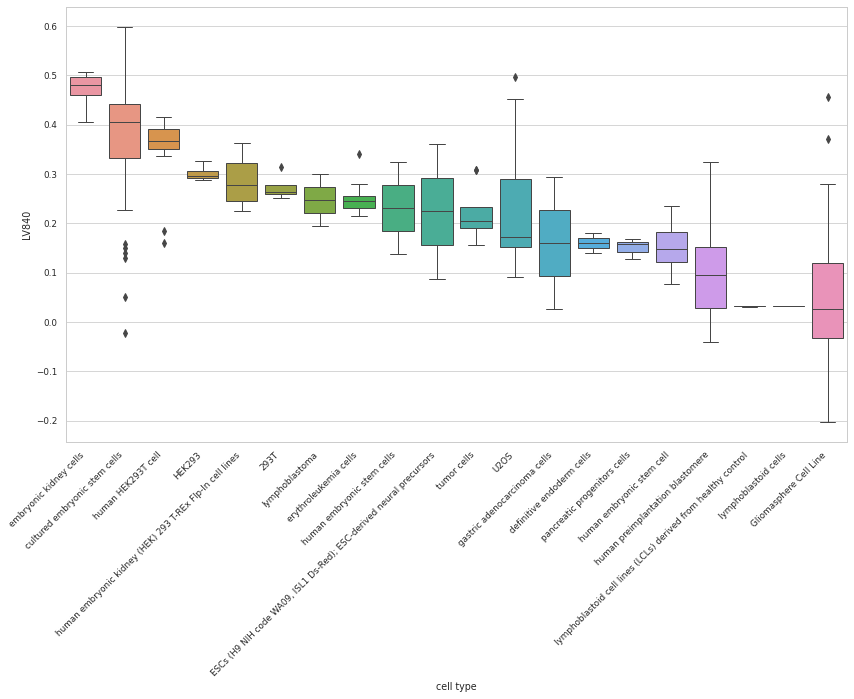

array(['SRP052950', 'SRP011546', 'SRP039348', 'SRP029515'], dtype=object)

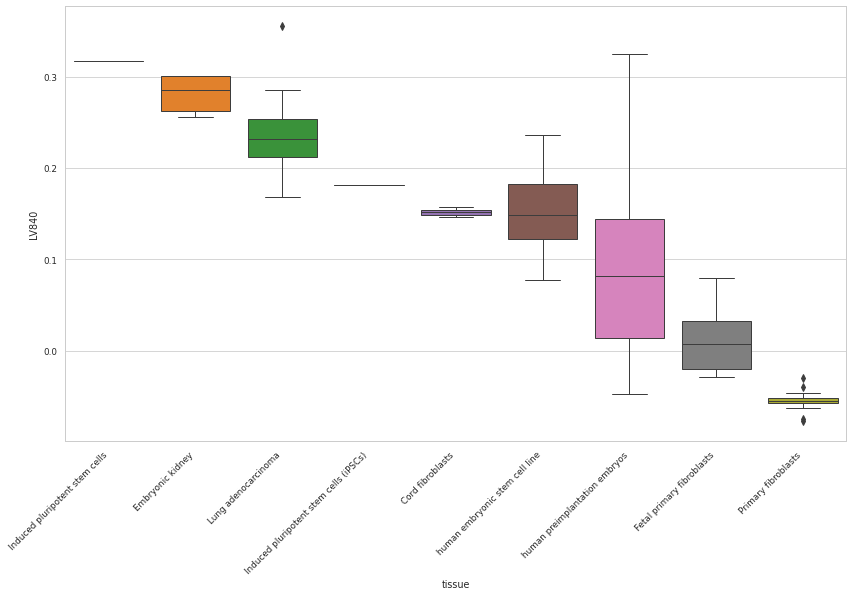

,pathway,LV index,AUC,p-value,FDR


SRP037775, SRP064259, SRP033250, SRP026537, SRP045322, SRP042620, SRP042161, SRP055569, SRP049500, SRP006575, SRP030475, SRP011974, SRP049507, SRP030401, SRP043470, SRP057205, SRP061241, SRP055512, SRP059379, SRP058722, SRP063620, SRP049988, SRP019498, SRP060416, SRP057196, SRP065202, SRP033135, SRP018853, SRP011054, SRP019936, SRP013389, SRP063840, SRP066834, SRP032789, SRP048664, SRP040966, SRP047192, SRP061243, SRP004637, SRP012557, SRP040418, SRP023262, SRP044610, SRP058571, SRP055153, SRP051102, SRP031503, SRP058773, SRP012167, SRP043320, SRP035988, SRP067214, SRP049713, SRP040505, SRP050971, SRP057758, SRP013239, SRP029334, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (56 != 58)
  warnings.warn(


''

sum of basophil and neutrophil counts                                                                   7.812599
neutrophil count                                                                                        7.782137
granulocyte count                                                                                       7.717013
sum of neutrophil and eosinophil counts                                                                 7.680676
myeloid white cell count                                                                                7.336095
30140_raw-Neutrophill_count                                                                             6.657680
3786_raw-Age_asthma_diagnosed                                                                           6.580418
leukocyte count                                                                                         6.457372
1717-Skin_colour                                                                                

''

,gene_name,LV189,gene_band
0,TCN1,7.445036,11q12.1
1,ALDH3B2,4.980042,11q13.2
2,MED1,4.384997,17q12
3,PSMD3,4.113116,17q21.1
4,CDK12,2.875934,17q12
5,RPL19,2.807342,17q12
6,PIP4K2B,2.794035,17q12
7,ERBB2,2.676997,17q12
8,MED24,2.188042,17q21.1
9,PIGO,1.995728,9p13.3


cell type       0.033189
tissue          0.003374
cell subtype    0.001682
tissue type     0.001054
dtype: float64

array(['SRP037775', 'SRP064259', 'SRP026537', 'SRP045322', 'SRP042161',
       'SRP055569', 'SRP049500', 'SRP006575', 'SRP049507', 'SRP055512',
       'SRP059379', 'SRP063620', 'SRP049988', 'SRP019498', 'SRP060416',
       'SRP057196', 'SRP065202', 'SRP033135', 'SRP011054', 'SRP063840',
       'SRP040966', 'SRP047192', 'SRP040418', 'SRP044610', 'SRP058571',
       'SRP055153', 'SRP051102', 'SRP031503', 'SRP049713', 'SRP040505',
       'SRP057758'], dtype=object)

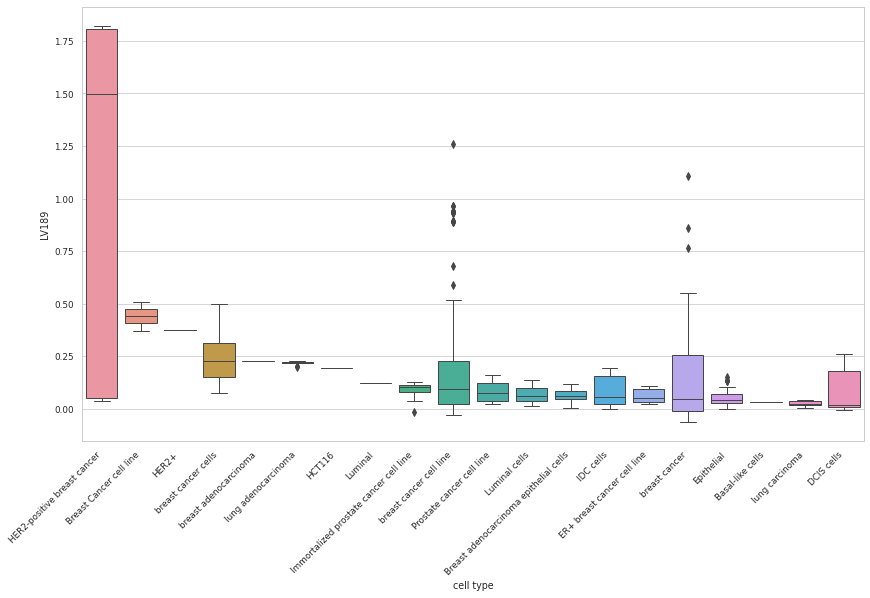

array(['SRP042620', 'SRP006575', 'SRP043470', 'SRP061241', 'SRP058722',
       'SRP057196', 'SRP066834', 'SRP047192', 'SRP061243', 'SRP004637',
       'SRP023262', 'SRP012167', 'SRP043320'], dtype=object)

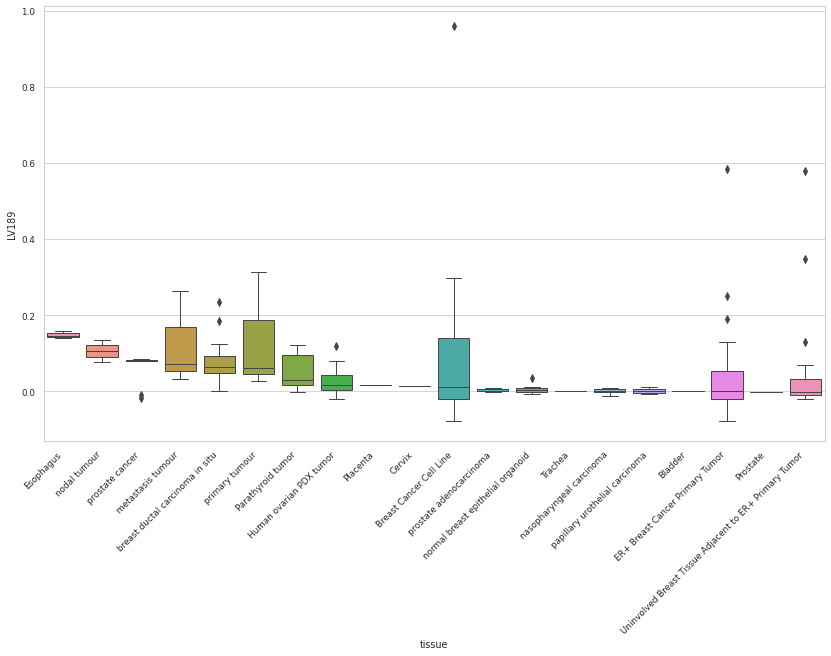

array(['SRP040418'], dtype=object)

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:430: UserWarning: Single value for cell subtype: 0.04152523889635197
  warnings.warn(f"Single value for {imp_f}: {cat_order}")


array(['SRP019936', 'SRP035988', 'SRP050971'], dtype=object)

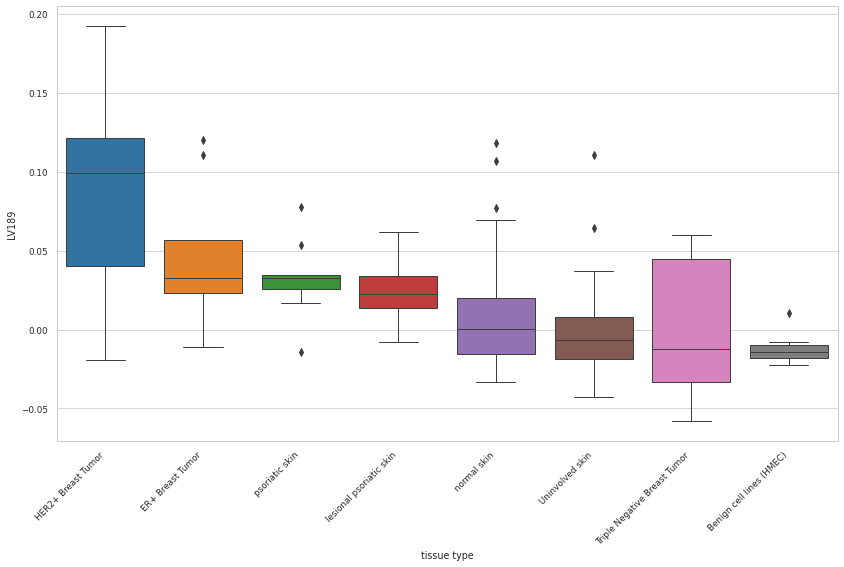

,pathway,LV index,AUC,p-value,FDR


SRP055569, SRP060416, SRP066834, SRP042161, SRP018853, SRP057196, SRP030617, SRP033135, SRP059379, SRP017411, SRP015013, SRP003754, SRP059735, SRP006575, SRP019994, SRP008145, SRP058773, SRP033276, SRP011185, SRP017575, SRP057205, SRP028554, SRP007498, SRP022892, SRP059035, SRP005279, SRP029899, SRP021478, SRP014591, SRP007947, SRP059775, SRP050499, SRP009247, SRP009862, SRP032775, SRP049988, SRP036053, SRP064464, SRP019936, SRP036821, SRP048759, SRP015715, SRP011974, SRP017777, SRP009266, SRP018838, SRP049500, SRP013363, SRP045869, SRP029334, SRP006474, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (47 != 51)
  warnings.warn(


''

20428-Professional_informed_about_anxiety                                                                                     4.272667
22601_91392859-Job_coding_other_work_in_these_industries_attendant_hand_mate_assistant_handler_loader                         4.101677
30070_raw-Red_blood_cell_erythrocyte_distribution_width                                                                       3.984521
30110_raw-Platelet_distribution_width                                                                                         3.904986
100250-Instant_coffee_intake                                                                                                  3.857128
I9_VTE-Venous_thromboembolism                                                                                                 3.624490
CHILDHOOD_ALLERGY-Childhood_allergy_age_16                                                                                    3.583215
I9_DVTANDPULM-DVT_of_lower_extremities_and_pulmonary_em

''

,gene_name,LV604,gene_band
0,ZNF530,7.785427,19q13.43
1,NRF1,5.134235,7q32.2
2,PLA2G16,3.717518,11q13.1
3,CD151,3.635994,11p15.5
4,DOHH,3.466955,19p13.3
5,PLD4,3.305211,14q32.33
6,ATP5L,2.331941,11q23.3
7,GALM,2.146170,2p22.1
8,KCNN4,1.961907,19q13.31
9,DHPS,1.948955,19p13.13


cell type         0.022461
cell subtype      0.004196
tissue            0.001639
tissue subtype    0.000590
tissue type       0.000209
dtype: float64

array(['SRP055569', 'SRP060416', 'SRP042161', 'SRP057196', 'SRP033135',
       'SRP059379', 'SRP017411', 'SRP059735', 'SRP006575', 'SRP059035',
       'SRP005279', 'SRP007947', 'SRP049988', 'SRP048759', 'SRP015715',
       'SRP049500'], dtype=object)

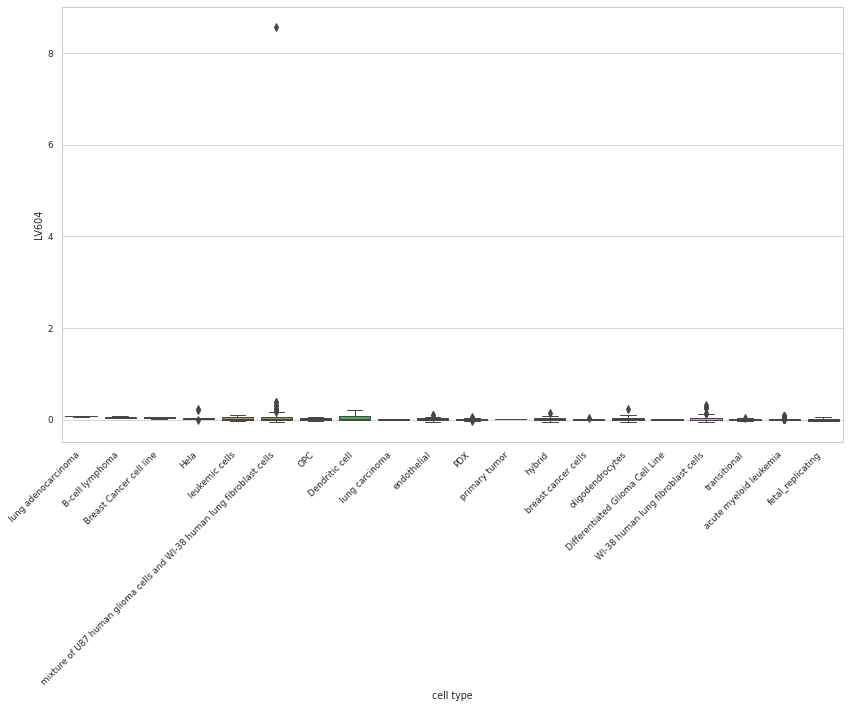

array(['SRP059735'], dtype=object)

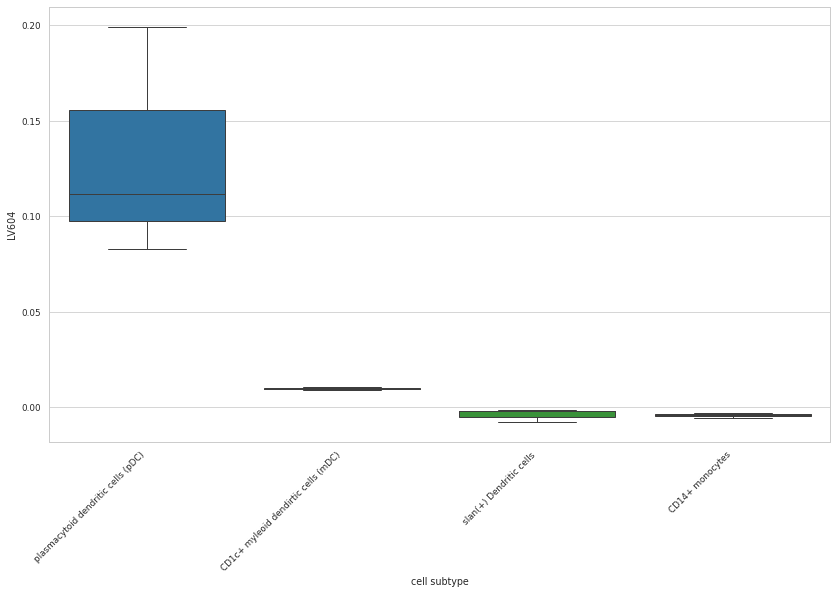

array(['SRP066834', 'SRP057196', 'SRP059735', 'SRP006575', 'SRP019994',
       'SRP033276', 'SRP017575', 'SRP028554', 'SRP005279', 'SRP029899',
       'SRP021478', 'SRP032775', 'SRP036053', 'SRP036821', 'SRP048759',
       'SRP017777', 'SRP045869'], dtype=object)

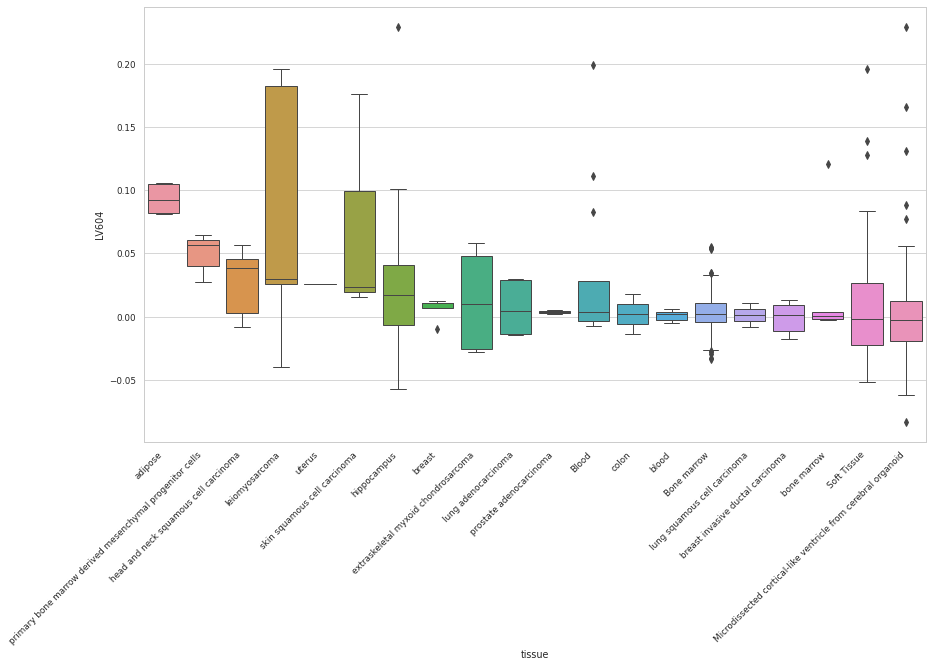

array(['SRP036821'], dtype=object)

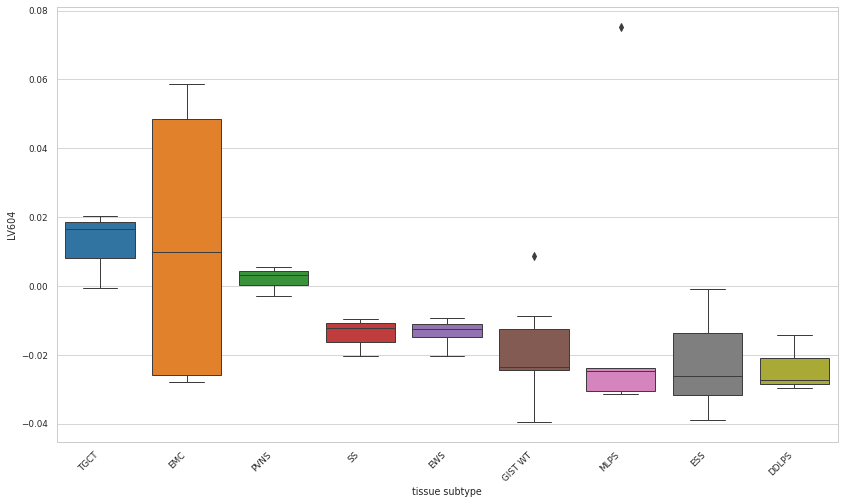

array(['SRP019936'], dtype=object)

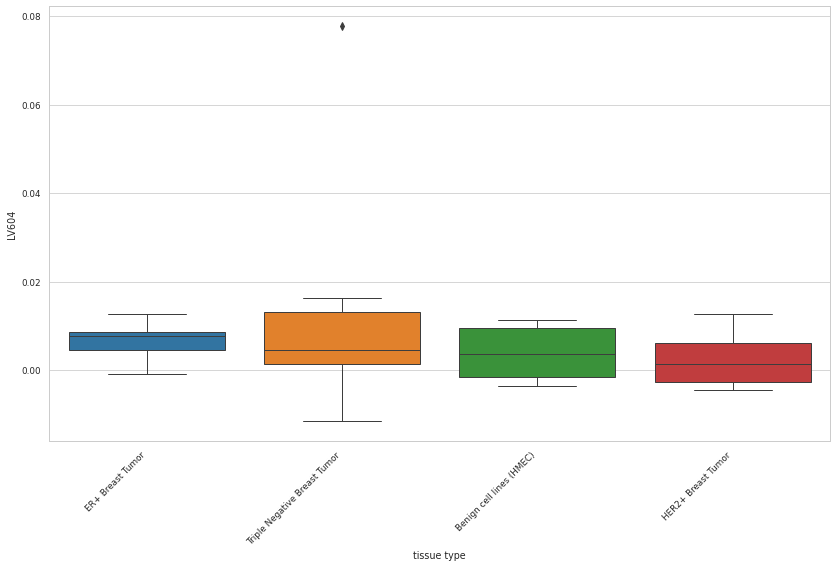

,pathway,LV index,AUC,p-value,FDR
1912,IRIS_Monocyte-Day1,854,0.629924,0.000275,0.002569
1913,SVM Monocytes,854,0.704285,0.006362,0.032598


SRP045352, SRP059695, SRP058237, SRP015360, SRP043033, SRP041826, SRP060416, SRP057852, SRP056295, SRP017138, SRP010644, SRP048801, SRP042228, SRP056733, SRP050272, SRP045500, SRP056197, SRP056098, SRP035679, SRP044303, SRP057196, SRP044286, SRP063363, SRP063493, SRP063500, SRP043080, SRP014856, SRP007461, SRP048759, SRP003726, SRP059205, SRP042031, SRP028594, SRP063496, SRP049097, SRP039361, SRP050000, SRP056840, SRP059735, SRP064454, SRP033266, SRP050493, SRP046233, SRP062958, SRP052491, SRP044271, SRP032789, SRP021191, SRP033466, SRP041538, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (49 != 50)
  warnings.warn(


''

20003_1140865396-Treatmentmedication_code_buscopan_10mg_tablet            4.799849
30110_raw-Platelet_distribution_width                                     4.068898
sum of neutrophil and eosinophil counts                                   3.543037
20505-Recent_easy_annoyance_or_irritability                               3.533662
neutrophil count                                                          3.493069
granulocyte count                                                         3.483130
22617_9229-Job_SOC_coding_Elementary_personal_services_occupations_nec    3.433437
sum of basophil and neutrophil counts                                     3.408604
6149_1-Mouthteeth_dental_problems_Mouth_ulcers                            3.364433
20003_1141157458-Treatmentmedication_code_hypromellose_product            3.326714
myeloid white cell count                                                  3.308093
5157_raw-6mm_asymmetry_index_left                                         3.256976
spin

''

,gene_name,LV854,gene_band
0,NLRP3,5.597717,1q44
1,FCAR,4.386595,19q13.42
2,CCRL2,4.049598,3p21.31
3,IL1B,3.482928,2q14.1
4,IRAK2,3.324875,3p25.3
5,PLAUR,3.293549,19q13.31
6,PTGS2,3.178406,1q31.1
7,IL1RN,2.979828,2q14.1
8,PPIF,2.877738,10q22.3
9,PLEK,2.717895,2p14


cell type       0.059692
tissue          0.015270
cell subtype    0.007591
tissue type     0.005661
dtype: float64

array(['SRP045352', 'SRP059695', 'SRP058237', 'SRP043033', 'SRP041826',
       'SRP060416', 'SRP057852', 'SRP056295', 'SRP010644', 'SRP056197',
       'SRP044303', 'SRP057196', 'SRP044286', 'SRP063363', 'SRP043080',
       'SRP014856', 'SRP048759', 'SRP003726', 'SRP059205', 'SRP042031',
       'SRP039361', 'SRP059735', 'SRP064454', 'SRP033266', 'SRP046233',
       'SRP062958', 'SRP052491', 'SRP044271', 'SRP021191'], dtype=object)

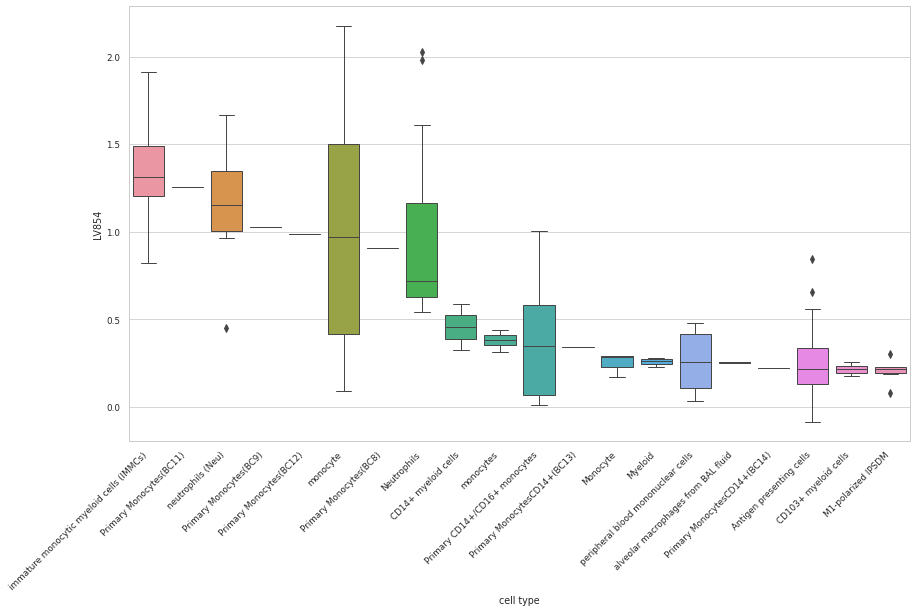

array(['SRP058237', 'SRP056295', 'SRP048801', 'SRP042228', 'SRP056197',
       'SRP057196', 'SRP063363', 'SRP048759', 'SRP003726', 'SRP028594',
       'SRP063496', 'SRP049097', 'SRP059735', 'SRP033266', 'SRP041538'],
      dtype=object)

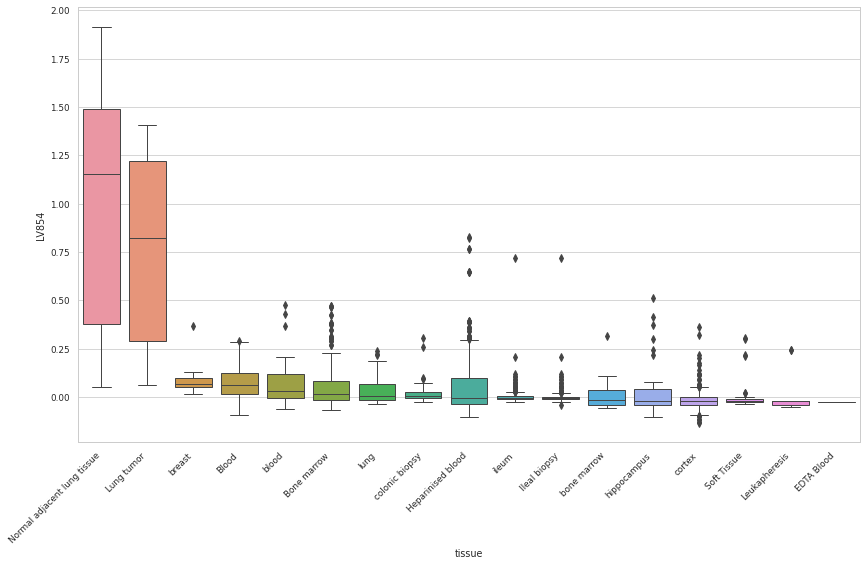

array(['SRP059735', 'SRP064454'], dtype=object)

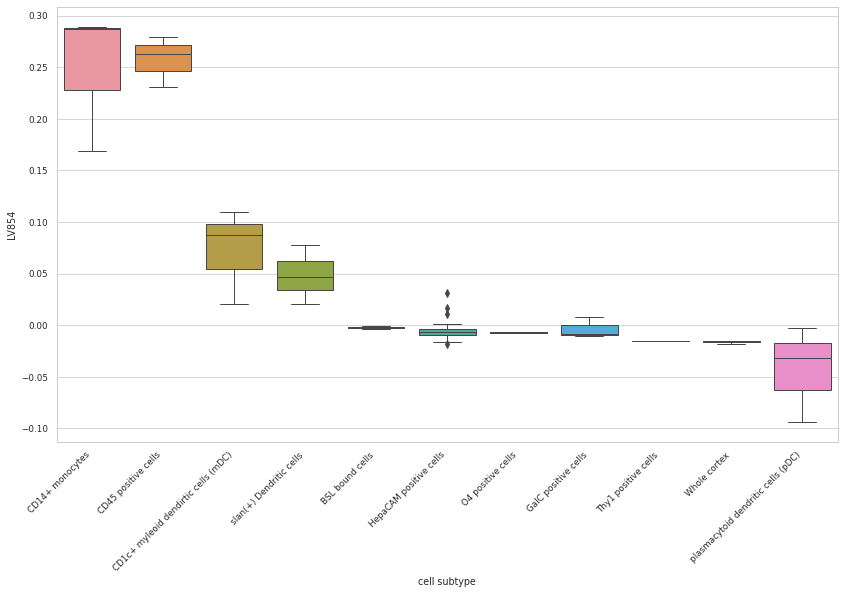

array(['SRP049097'], dtype=object)

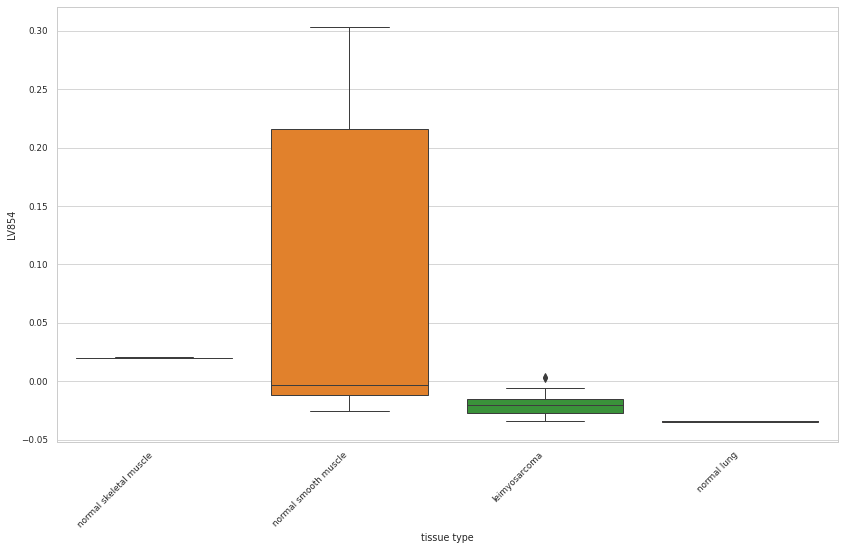

,pathway,LV index,AUC,p-value,FDR
1473,MIPS_39S_RIBOSOMAL_SUBUNIT_MITOCHONDRIAL,583,0.772158,0.0009,0.007136


SRP055569, SRP009266, SRP042161, SRP015449, SRP016003, SRP057196, SRP027345, SRP060416, SRP033135, SRP023262, SRP007498, SRP002915, SRP006575, SRP036821, SRP050499, SRP057205, SRP066834, SRP007596, SRP015976, SRP014790, SRP010670, SRP031507, SRP029889, SRP018853, SRP026315, SRP009862, SRP029656, SRP024268, SRP044956, SRP007947, SRP055153, SRP045869, SRP012461, SRP038919, SRP017575, SRP060715, SRP014213, SRP063840, SRP055390, SRP053052, SRP007525, SRP009276, SRP064464, SRP015853, SRP014428, SRP044611, SRP015640, SRP025982, SRP013725, SRP061840, SRP008280, SRP058383, SRP062956, SRP007461, SRP009247, SRP018317, SRP017411, SRP056295, SRP003726, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (56 != 59)
  warnings.warn(


''

30070_raw-Red_blood_cell_erythrocyte_distribution_width                          5.022332
K11_COELIAC-Coeliac_disease                                                      4.301469
psoriasis                                                                        4.269449
malabsorption syndrome                                                           3.908618
6159_6-Pain_types_experienced_in_last_month_Hip_pain                             3.732511
systemic lupus erythematosus                                                     3.540258
infectious arthritis                                                             3.378072
1458-Cereal_intake                                                               3.265663
I9_PERICARD-Pericarditis                                                         3.259804
6179_1-Mineral_and_other_dietary_supplements_Fish_oil_including_cod_liver_oil    3.219702
20003_1140909674-Treatmentmedication_code_cod_liver_oil_capsule                  3.133822
M13_PYOGAR

''

,gene_name,LV583,gene_band
0,PLD1,6.624045,3q26.31
1,MRPL41,6.331887,9q34.3
2,VARS,3.613773,6p21.33
3,ARPC5L,3.259257,9q33.3
4,MRPS21,2.802774,1q21.2
5,NDUFS7,2.588948,19p13.3
6,MED8,2.550340,1p34.2
7,PIM1,2.521733,6p21.2
8,ANAPC4,1.852071,4p15.2
9,CUL3,1.834372,2q36.2


cell type         0.020258
tissue subtype    0.001653
tissue type       0.001468
tissue            0.001018
dtype: float64

array(['SRP055569', 'SRP042161', 'SRP057196', 'SRP060416', 'SRP033135',
       'SRP006575', 'SRP007596', 'SRP015976', 'SRP010670', 'SRP031507',
       'SRP026315', 'SRP007947', 'SRP055153', 'SRP012461', 'SRP060715',
       'SRP014213', 'SRP063840', 'SRP055390', 'SRP053052', 'SRP009276',
       'SRP015853', 'SRP014428', 'SRP044611', 'SRP015640', 'SRP058383',
       'SRP062956', 'SRP017411', 'SRP056295', 'SRP003726'], dtype=object)

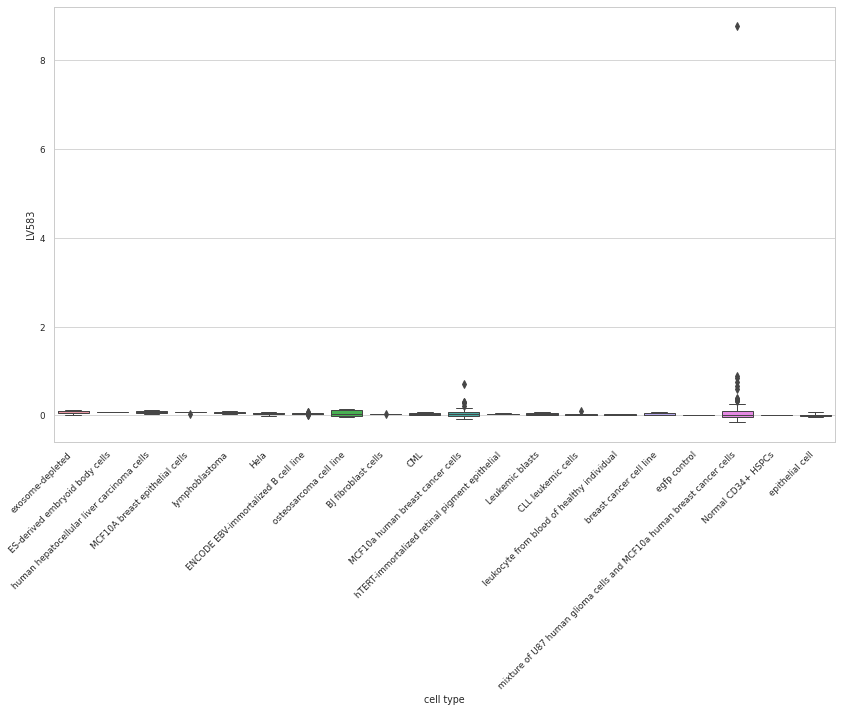

array(['SRP036821'], dtype=object)

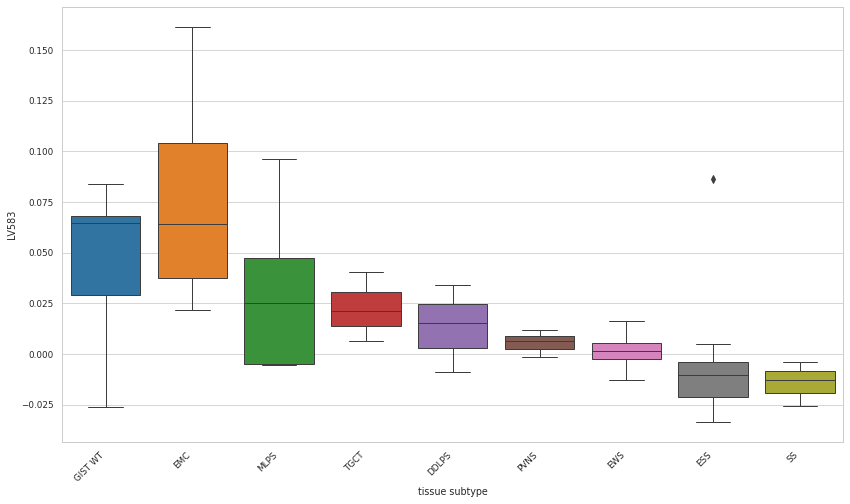

array(['SRP044956'], dtype=object)

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:430: UserWarning: Single value for tissue type: 0.04806242051021496
  warnings.warn(f"Single value for {imp_f}: {cat_order}")


array(['SRP057196', 'SRP023262', 'SRP006575', 'SRP036821', 'SRP066834',
       'SRP029889', 'SRP024268', 'SRP044956', 'SRP045869', 'SRP017575',
       'SRP055390', 'SRP014428', 'SRP058383', 'SRP056295', 'SRP003726'],
      dtype=object)

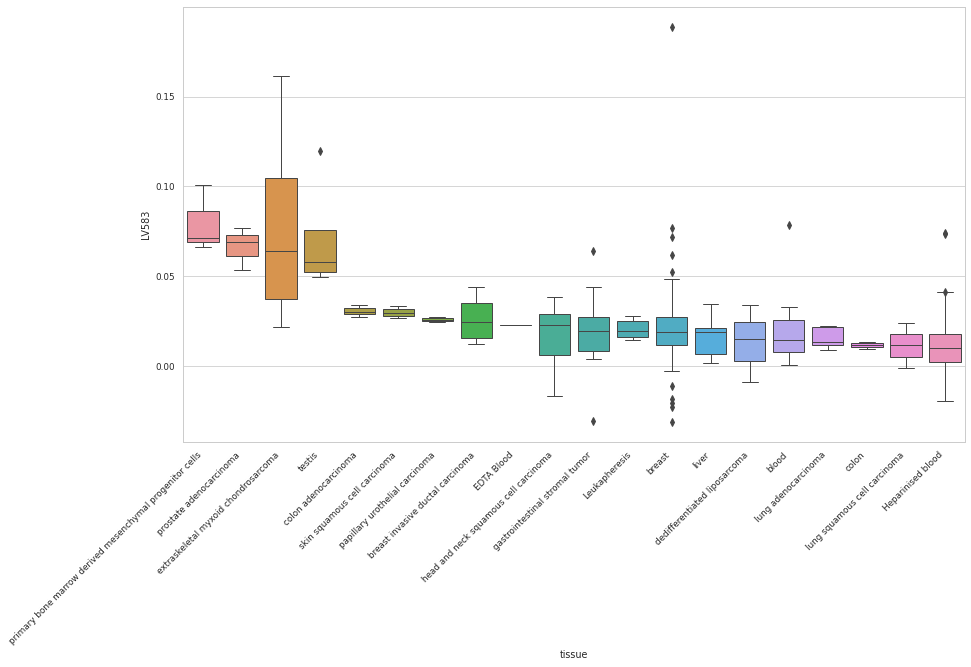

,pathway,LV index,AUC,p-value,FDR


SRP033135, SRP055569, SRP050499, SRP018853, SRP066834, SRP002326, SRP012461, SRP014739, SRP010279, SRP060416, SRP042161, SRP057196, SRP058773, SRP007359, SRP017777, SRP055153, SRP022892, SRP061888, SRP018838, SRP027383, SRP029656, SRP059035, SRP025982, SRP030617, SRP063840, SRP009247, SRP049449, SRP034953, SRP014591, SRP064259, SRP018837, SRP055513, SRP029603, SRP007881, SRP041094, SRP051102, SRP017411, SRP029889, SRP006719, SRP034712, SRP050992, SRP059379, SRP013725, SRP049479, SRP050260, SRP007338, SRP033612, 

''

M13_HAMMERTOE-Other_hammer_toes_acquired                                                                  4.358427
M13_GANGLION-Ganglion                                                                                     3.463010
40001_C64-Underlying_primary_cause_of_death_ICD10_C64_Malignant_neoplasm_of_kidney_except_renal_pelvis    3.263002
41219_1-Anaesthetics_administered_during_delivery_General_anaesthetic                                     3.220478
22615_1-Workplace_had_a_lot_of_diesel_exhaust_Sometimes                                                   3.183717
20003_1140921600-Treatmentmedication_code_citalopram                                                      3.156470
5306-6mm_index_of_best_keratometry_results_left                                                           3.077641
esophageal varices                                                                                        3.054749
1369-Beef_intake                                                                

''

,gene_name,LV170,gene_band
0,PRKAB2,7.798982,1q21.1
1,MRPL45,6.906982,17q12
2,LIG4,5.702516,13q33.3
3,PCCB,5.563224,3q22.3
4,NME6,4.138959,3p21.31
5,B3GAT3,4.077711,11q12.3
6,PANK1,3.858235,10q23.31
7,DLG5,3.673050,10q22.3
8,FRS2,3.397622,12q15
9,SRP54,2.714743,14q13.2


cell type    0.036925
tissue       0.003609
dtype: float64

array(['SRP033135', 'SRP055569', 'SRP012461', 'SRP060416', 'SRP042161',
       'SRP057196', 'SRP055153', 'SRP059035', 'SRP063840', 'SRP049449',
       'SRP064259', 'SRP041094', 'SRP051102', 'SRP017411', 'SRP050992',
       'SRP059379', 'SRP033612'], dtype=object)

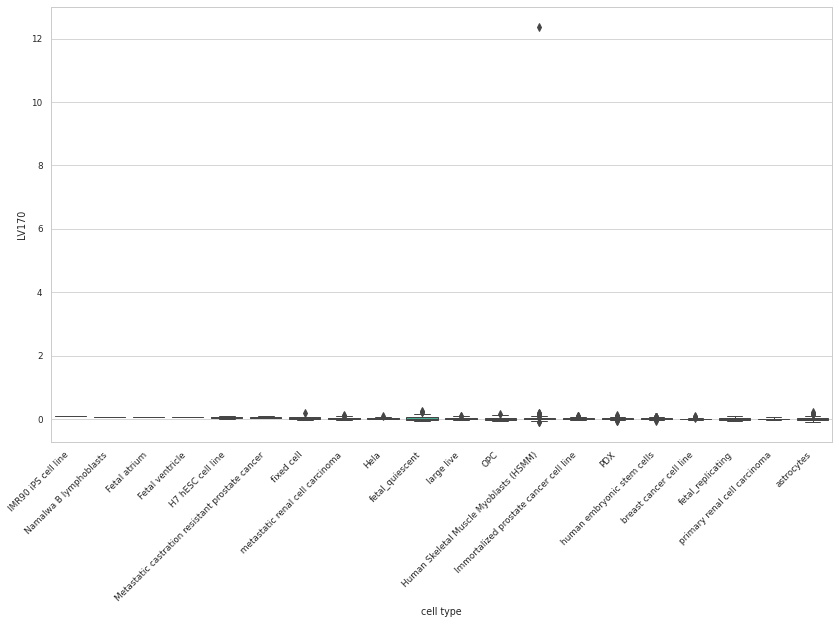

array(['SRP066834', 'SRP002326', 'SRP014739', 'SRP057196', 'SRP007359',
       'SRP017777', 'SRP061888', 'SRP034953', 'SRP055513', 'SRP007881',
       'SRP029889', 'SRP050260'], dtype=object)

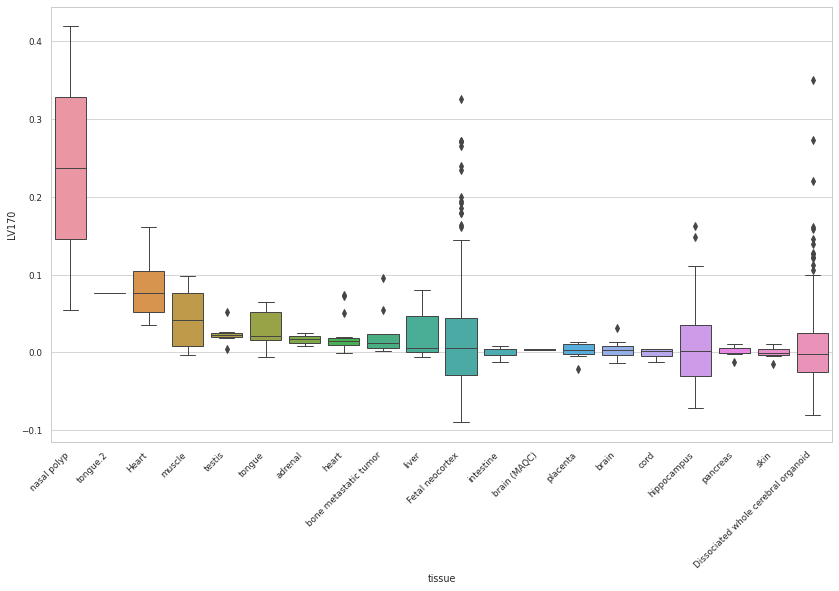

,pathway,LV index,AUC,p-value,FDR


SRP055569, SRP033135, SRP066834, SRP042161, SRP012461, SRP057196, SRP060416, SRP018838, SRP058773, SRP011578, SRP045659, SRP050499, SRP059170, SRP034953, SRP056733, SRP030617, SRP005279, SRP064464, SRP063840, SRP009251, SRP059775, SRP011054, SRP029656, SRP007338, SRP059379, SRP009266, SRP048801, SRP057205, SRP006575, SRP059039, SRP055153, SRP045869, SRP017575, SRP002487, SRP015013, SRP016003, SRP025982, SRP017777, SRP056840, SRP050000, SRP033248, SRP019994, SRP024268, SRP007947, SRP028336, SRP042228, SRP049068, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (46 != 47)
  warnings.warn(


''

platelet count                                                                                                   4.107873
30260_raw-Mean_reticulocyte_volume                                                                               4.099802
20492-Longest_period_of_mania_or_irritability                                                                    4.013155
lumbar disc herniation                                                                                           3.658054
30080_raw-Platelet_count                                                                                         3.593352
20003_1140871692-Treatmentmedication_code_morphine                                                               3.529943
5262_raw-Intraocular_pressure_cornealcompensated_left                                                            3.383382
20538-Worried_most_days_during_period_of_worst_anxiety                                                           3.346124
22617_7123-Job_SOC_codin

''

,gene_name,LV608,gene_band
0,STARD13,7.815065,13q13.1
1,RCOR1,5.850763,14q32.31
2,CAPNS1,3.674000,19q13.12
3,CD151,3.521148,11p15.5
4,SCO2,2.678248,22q13.33
5,MRPL39,2.626700,21q21.3
6,UXS1,2.431993,2q12.2
7,CAPZA1,2.363682,1p13.2
8,PHKB,2.183609,16q12.1
9,VPS37A,2.140915,8p22


cell type    0.023711
tissue       0.000907
dtype: float64

array(['SRP055569', 'SRP033135', 'SRP042161', 'SRP012461', 'SRP057196',
       'SRP060416', 'SRP011578', 'SRP059170', 'SRP005279', 'SRP063840',
       'SRP011054', 'SRP059379', 'SRP006575', 'SRP055153', 'SRP007947',
       'SRP049068'], dtype=object)

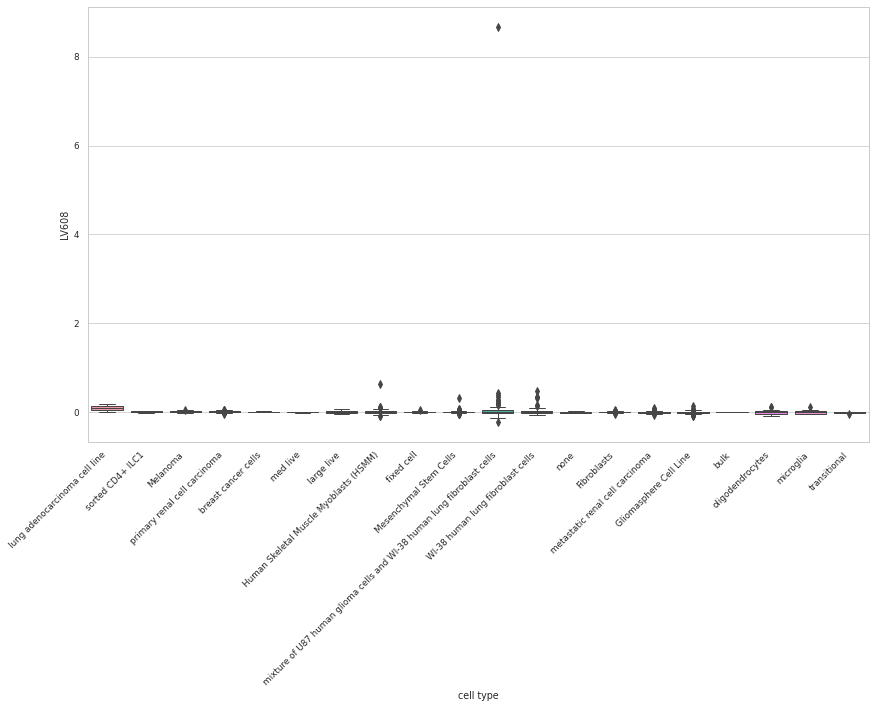

array(['SRP066834', 'SRP057196', 'SRP059170', 'SRP034953', 'SRP005279',
       'SRP009251', 'SRP048801', 'SRP006575', 'SRP059039', 'SRP045869',
       'SRP017575', 'SRP017777', 'SRP033248', 'SRP019994', 'SRP024268',
       'SRP028336', 'SRP042228'], dtype=object)

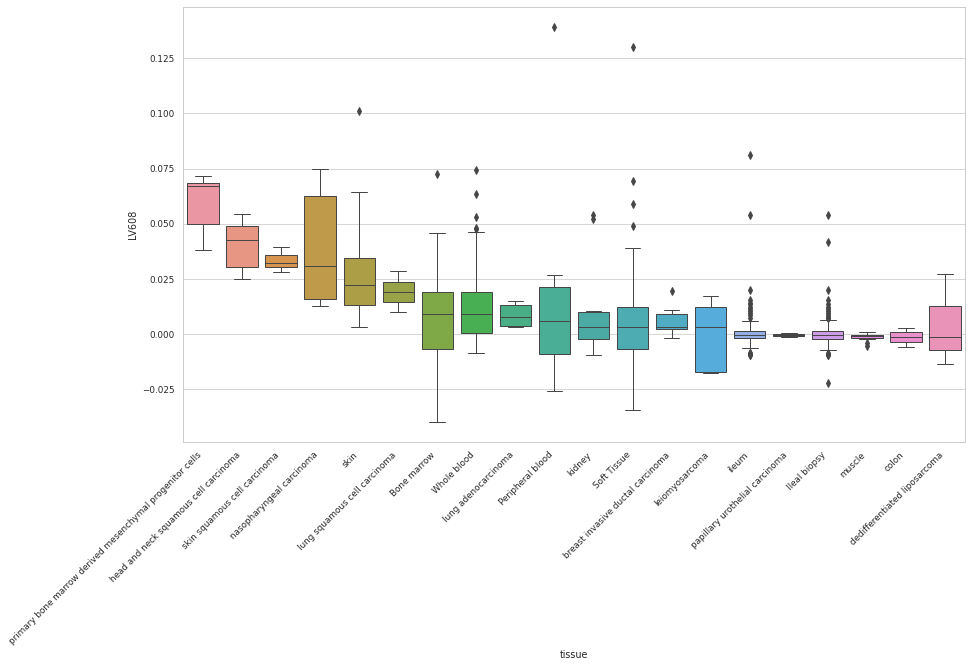

,pathway,LV index,AUC,p-value,FDR


SRP042161, SRP055569, SRP066834, SRP012461, SRP060416, SRP055153, SRP057196, SRP058773, SRP033135, SRP050499, SRP059379, SRP042218, SRP003901, SRP009266, SRP063840, SRP018838, SRP059775, SRP014620, SRP064464, SRP058667, SRP050992, SRP047192, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (21 != 22)
  warnings.warn(


''

20544_16-Mental_health_problems_ever_diagnosed_by_a_professional_Anorexia_nervosa                                                                                        3.545897
30300_raw-High_light_scatter_reticulocyte_count                                                                                                                          3.427002
22601_52232929-Job_coding_metal_working_production_or_maintenance_fitter_machine_fitter_fitter_and_turner_bench_fitter_plant_fitter                                      3.417433
5256_raw-Corneal_hysteresis_right                                                                                                                                        3.352935
6138_4-Qualifications_CSEs_or_equivalent                                                                                                                                 3.226950
5257_raw-Corneal_resistance_factor_right                                                                      

''

,gene_name,LV926,gene_band
0,SMARCAL1,3.882944,2q35
1,ZNF300,3.250340,5q33.1
2,EIF5A2,3.221594,3q26.2
3,ANKRA2,3.091858,5q13.2
4,RFXANK,2.985745,19p13.11
5,B4GALT4,2.781291,3q13.32
6,ME3,2.575962,11q14.2
7,TBCE,2.499343,
8,TREX1,2.472860,3p21.31
9,SPRY1,2.388656,4q28.1


cell type         0.027062
tissue            0.005731
tissue subtype    0.003305
tissue type       0.003305
dtype: float64

array(['SRP042161', 'SRP055569', 'SRP012461', 'SRP060416', 'SRP055153',
       'SRP057196', 'SRP033135', 'SRP059379', 'SRP042218', 'SRP063840',
       'SRP014620', 'SRP050992', 'SRP047192'], dtype=object)

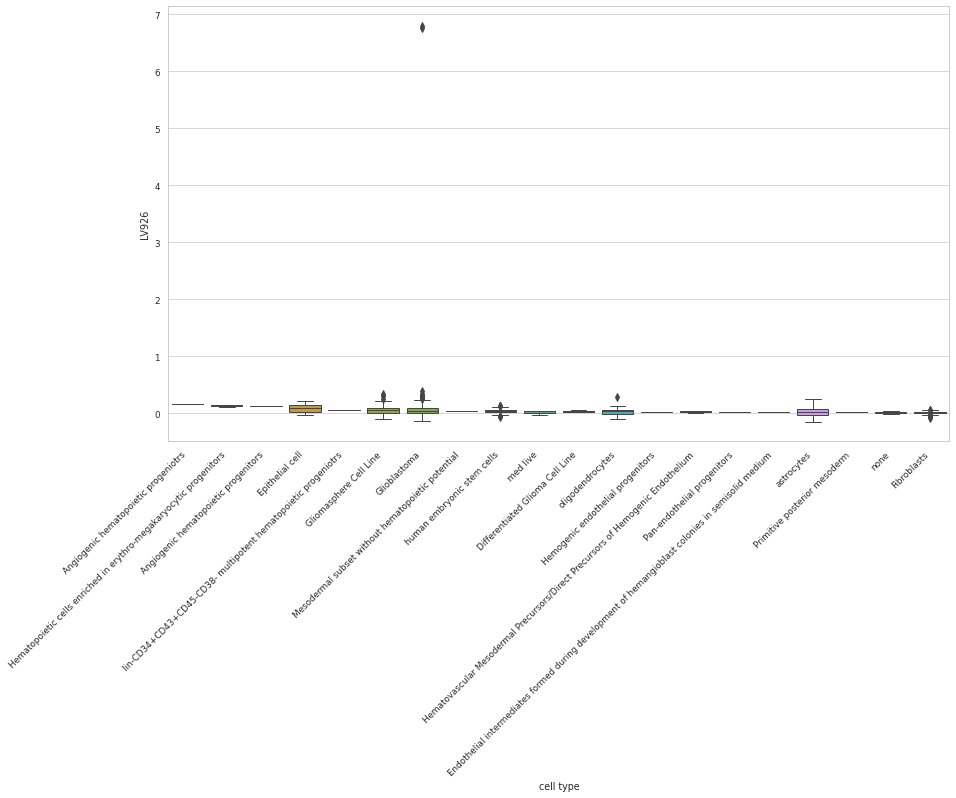

array(['SRP066834', 'SRP057196', 'SRP042218', 'SRP003901', 'SRP047192'],
      dtype=object)

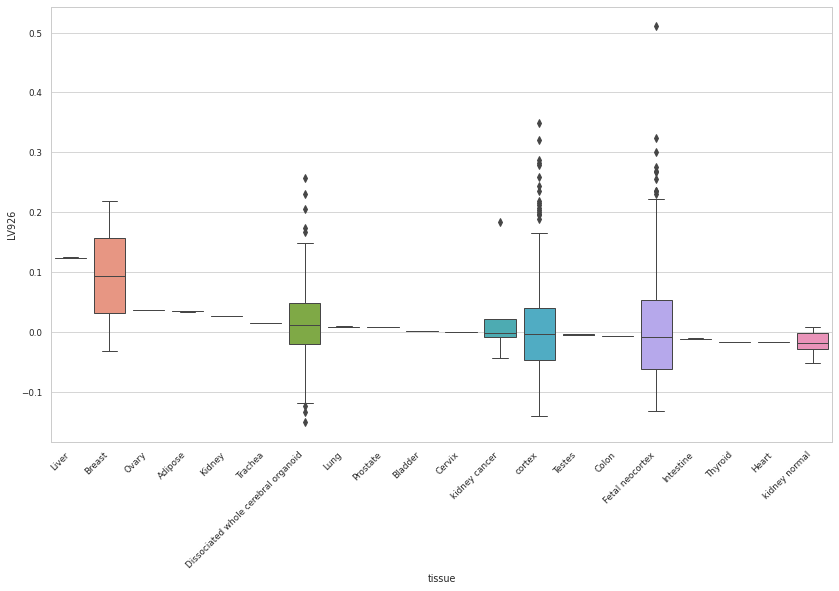

array(['SRP058667'], dtype=object)

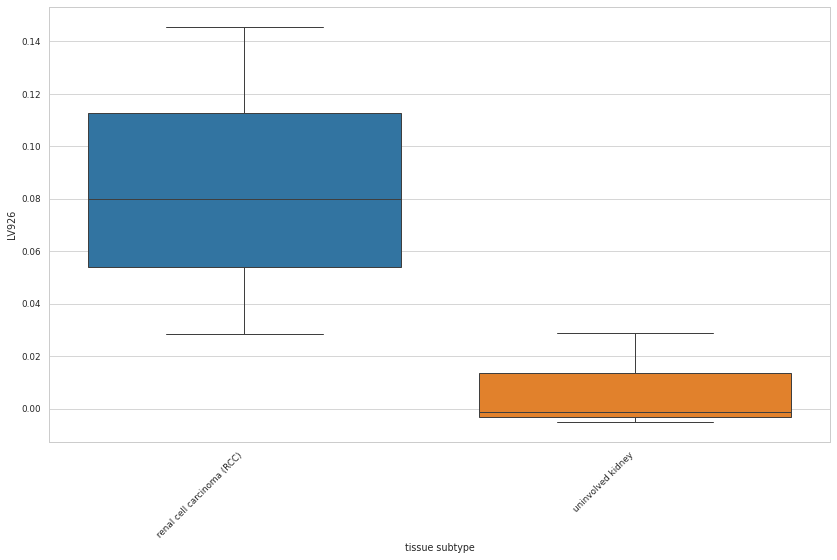

array(['SRP058667'], dtype=object)

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:430: UserWarning: Single value for tissue type: 0.028636479586349097
  warnings.warn(f"Single value for {imp_f}: {cat_order}")


,pathway,LV index,AUC,p-value,FDR


SRP058773, SRP060416, SRP005279, SRP064464, SRP055569, SRP057196, SRP057852, SRP064259, SRP066834, SRP024268, SRP042161, SRP057248, SRP014487, SRP014213, SRP033135, SRP045659, SRP055153, SRP019207, SRP041833, SRP067173, SRP020646, SRP043085, SRP055810, SRP056049, SRP057205, SRP018020, SRP026537, SRP056733, SRP056295, SRP056098, SRP048759, SRP068523, SRP050499, SRP036821, SRP059379, SRP030617, SRP002184, SRP022591, SRP059775, SRP050992, SRP008218, SRP033248, SRP018853, SRP053246, SRP063840, SRP018525, SRP029656, SRP018837, SRP042620, SRP045352, SRP008145, 

''

20003_1140911640-Treatmentmedication_code_lecithin_product                4.247985
somatoform disorder                                                       4.068040
20003_1140888390-Treatmentmedication_code_ferrous_salt_product            3.277558
20090_363-Type_of_fatoil_used_in_cooking_Unknown_fat_butter               3.272502
SFN-Small_fibre_neuropathy                                                3.144017
102400-Savoury_snack_consumers                                            3.132480
dry eye syndrome                                                          3.037951
3942-Adopted_mother_still_alive                                           2.992769
L12_OTHERMELANIN-Other_melanin_hyperpigmentation                          2.925342
20003_1140865382-Treatmentmedication_code_merbentyl_10mg_tablet           2.799392
22617_2419-Job_SOC_coding_Legal_professionals_nec                         2.796406
20003_1141171496-Treatmentmedication_code_trospium                        2.789213
4288

''

,gene_name,LV420,gene_band
0,SEC24B,4.992110,4q25
1,DCP2,4.900183,5q22.2
2,CCR8,4.075553,3p22.1
3,SAP30,3.665104,4q34.1
4,TAF2,3.476207,8q24.12
5,NINL,3.145995,20p11.21
6,NXF1,2.709774,11q12.3
7,TNIP3,2.291252,4q27
8,IMPA2,2.089676,18p11.21
9,NAGPA,1.994271,16p13.3


tissue            0.003029
cell type         0.002761
tissue subtype    0.000569
dtype: float64

array(['SRP005279', 'SRP057196', 'SRP066834', 'SRP024268', 'SRP014487',
       'SRP043085', 'SRP056295', 'SRP048759', 'SRP036821', 'SRP008218',
       'SRP033248', 'SRP042620'], dtype=object)

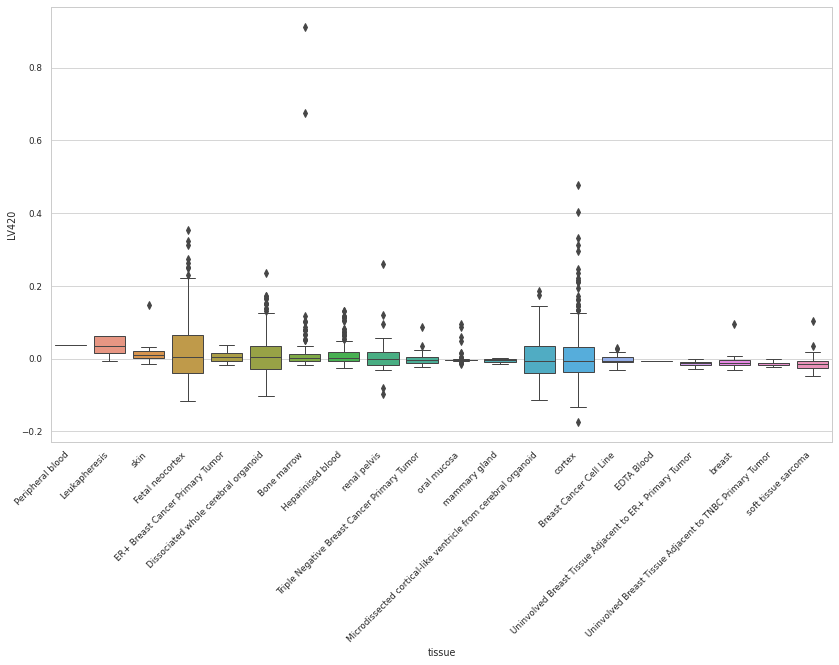

array(['SRP060416', 'SRP005279', 'SRP055569', 'SRP057196', 'SRP057852',
       'SRP064259', 'SRP042161', 'SRP014487', 'SRP014213', 'SRP033135',
       'SRP055153', 'SRP041833', 'SRP043085', 'SRP026537', 'SRP056295',
       'SRP048759', 'SRP068523', 'SRP059379', 'SRP002184', 'SRP050992',
       'SRP008218', 'SRP053246', 'SRP063840', 'SRP018525', 'SRP045352'],
      dtype=object)

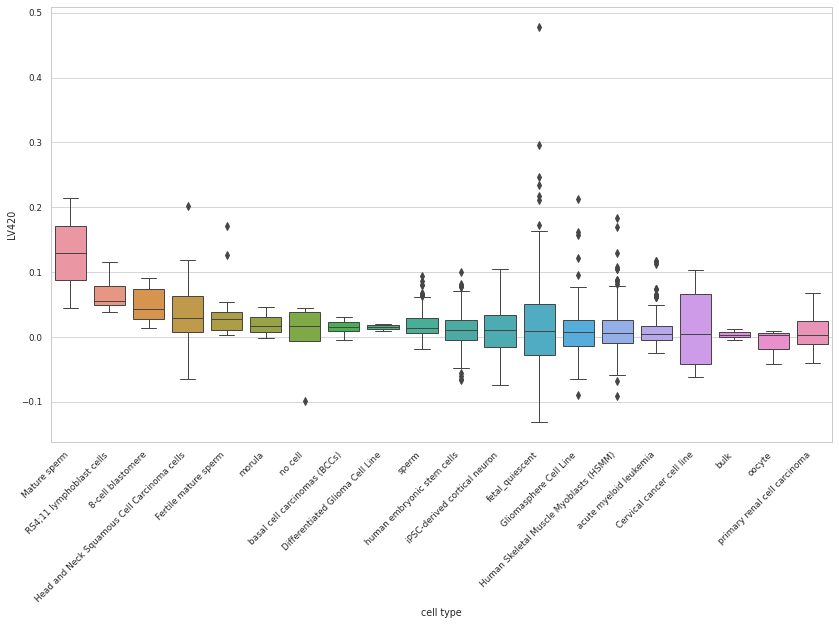

array(['SRP036821'], dtype=object)

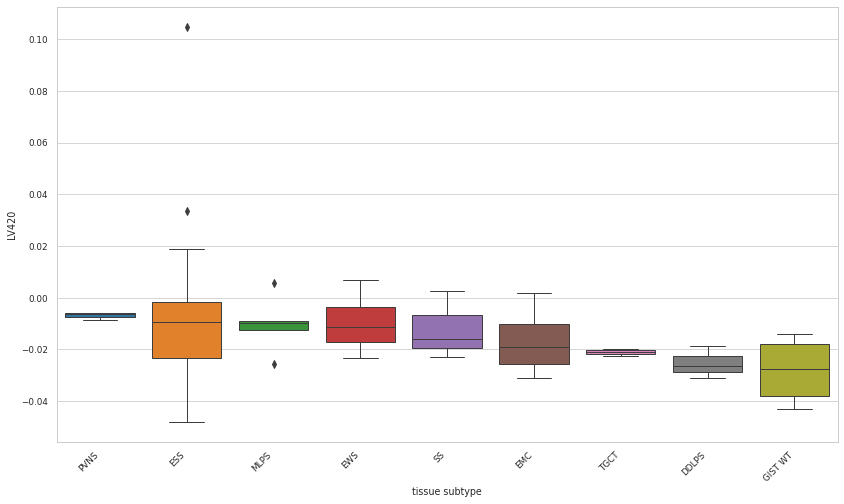

,pathway,LV index,AUC,p-value,FDR


SRP055569, SRP042161, SRP006474, SRP033135, SRP017575, SRP036821, SRP006575, SRP057196, SRP009266, SRP050499, SRP066834, SRP065202, SRP019994, SRP060416, SRP047192, SRP005279, SRP059775, SRP049097, SRP059379, SRP058773, SRP007359, SRP061241, SRP012461, SRP009862, SRP042620, SRP049713, SRP014620, SRP057745, SRP003754, SRP033369, SRP033276, SRP014428, SRP027383, SRP049238, SRP045322, SRP062230, SRP024268, SRP058841, SRP018838, SRP002915, SRP055810, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (38 != 41)
  warnings.warn(


''

H8_MENIERE-Ménière_disease                                                        4.259936
TRAUMBRAIN_NONCONCUS-severe_traumatic_brain_injury_does_not_include_concussion    3.912594
22601_52232941-Job_coding_motor_vehicleindustrial_machinery_fitter                3.883046
anxiety AND panic disorder                                                        3.787045
20471-Ever_seen_an_unreal_vision                                                  3.675024
M13_SOFTOVERUSE-Soft_tissue_disorders_related_to_use_overuse_and_pressure         3.523381
20554_4-Actions_taken_following_selfharm_Use_a_helpline_voluntary_organization    3.430470
5158_raw-6mm_asymmetry_index_right                                                3.392353
20003_1141168752-Treatmentmedication_code_peptac_liquid                           3.289474
20090_368-Type_of_fatoil_used_in_cooking_Normal_fat_olive_spread                  3.209467
20003_1140861276-Treatmentmedication_code_lacidipine                              3.200511

''

,gene_name,LV272,gene_band
0,GGCT,6.796871,7p14.3
1,HMGN1,6.128429,21q22.2
2,GNPNAT1,5.657774,14q22.1
3,TLE2,5.438517,19p13.3
4,DDB1,4.499474,11q12.2
5,HECTD3,3.632601,1p34.1
6,FOXM1,2.823613,12p13.33
7,CPSF6,2.789736,12q15
8,GUK1,2.705362,1q42.13
9,STX12,2.356745,1p35.3


cell type         0.034941
tissue subtype    0.005081
tissue            0.001514
tissue type       0.000793
dtype: float64

array(['SRP055569', 'SRP042161', 'SRP033135', 'SRP006575', 'SRP057196',
       'SRP065202', 'SRP060416', 'SRP047192', 'SRP005279', 'SRP059379',
       'SRP012461', 'SRP049713', 'SRP014620', 'SRP014428', 'SRP049238',
       'SRP045322', 'SRP062230'], dtype=object)

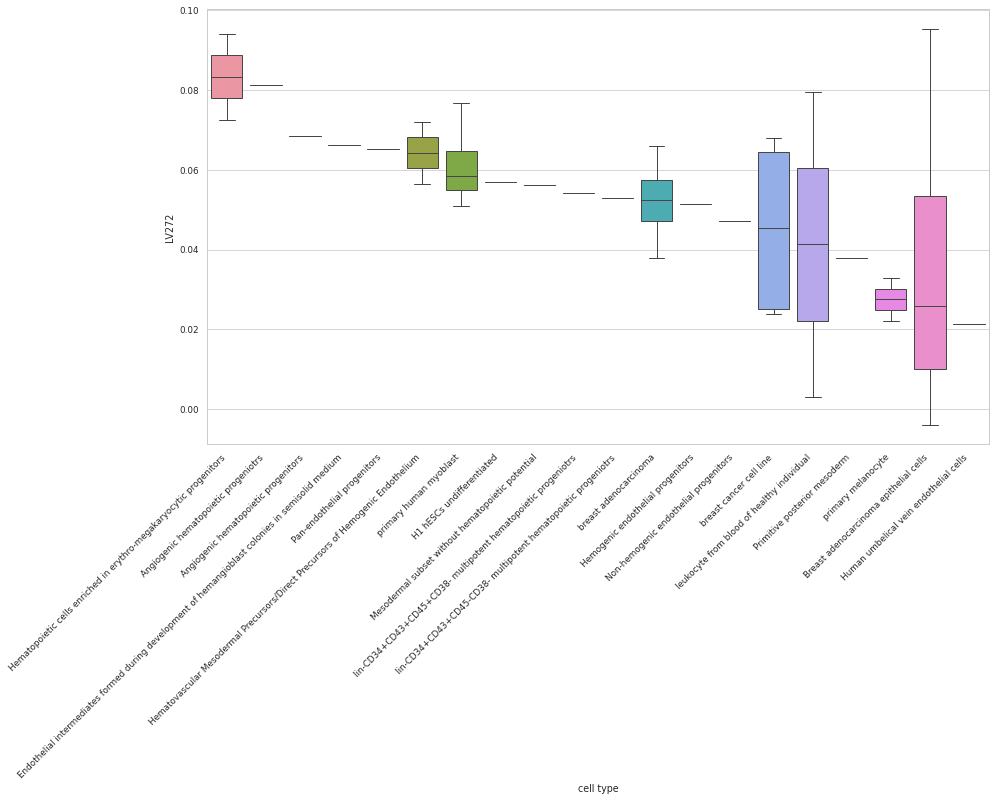

array(['SRP036821'], dtype=object)

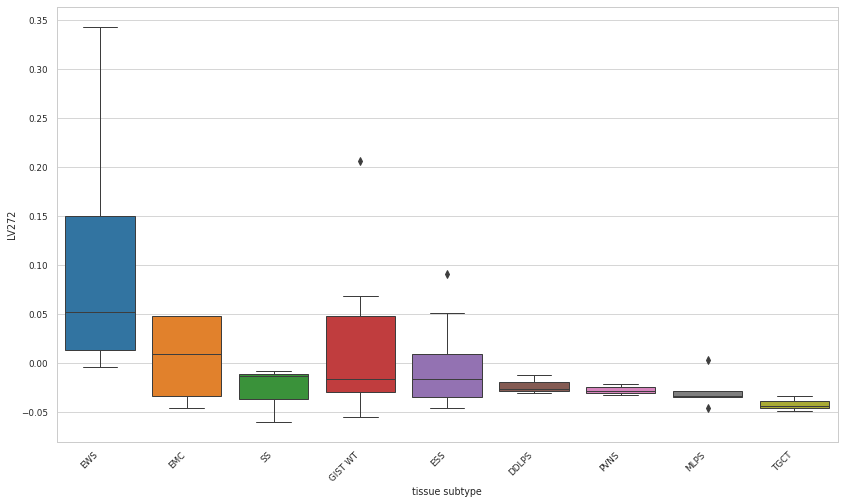

array(['SRP017575', 'SRP036821', 'SRP006575', 'SRP057196', 'SRP066834',
       'SRP019994', 'SRP047192', 'SRP005279', 'SRP049097', 'SRP007359',
       'SRP061241', 'SRP042620', 'SRP033276', 'SRP014428', 'SRP024268'],
      dtype=object)

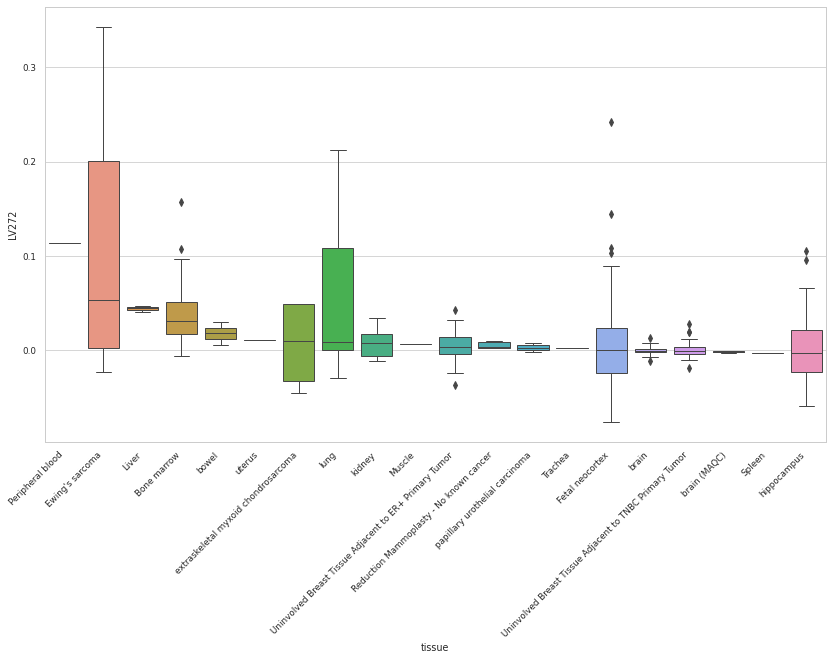

array(['SRP049097'], dtype=object)

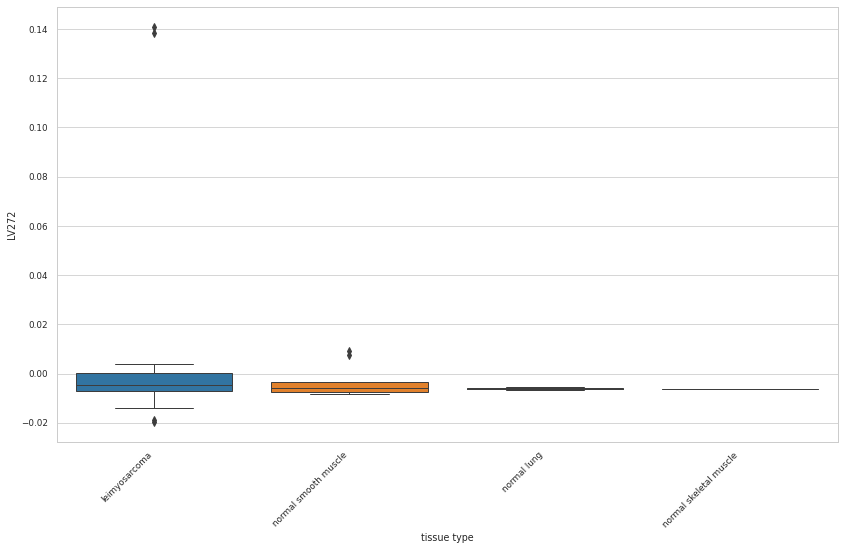

,pathway,LV index,AUC,p-value,FDR


SRP007412, SRP051844, SRP058181, SRP019762, SRP017959, SRP057196, SRP044668, SRP027383, SRP029889, SRP042161, SRP048683, SRP045900, SRP009144, SRP007338, SRP002274, SRP040622, SRP028336, SRP003611, SRP009247, SRP007351, SRP032539, SRP058351, SRP017933, SRP033725, SRP007483, SRP064454, SRP032540, SRP056477, SRP025982, SRP007494, SRP043364, SRP015668, SRP030628, SRP033464, SRP031501, 

''

20003_1141152732-Treatmentmedication_code_mirtazapine                                                                          3.611497
20003_1140868064-Treatmentmedication_code_serc8_tablet                                                                         3.246654
22617_5216-Job_SOC_coding_Pipe_fitters                                                                                         3.231762
upper extremity fracture                                                                                                       3.205771
22617_9225-Job_SOC_coding_Bar_staff                                                                                            3.165481
22601_92253391-Job_coding_bar_staff_cellarman_public_house                                                                     2.945632
20090_386-Type_of_fatoil_used_in_cooking_Normal_fat_soya_margarine                                                             2.915797
22601_62192607-Job_coding_bus_conductor         

''

,gene_name,LV60,gene_band
0,ABCA2,4.808228,9q34.3
1,MAG,4.560712,19q13.12
2,GJC2,4.402682,1q42.13
3,TTYH2,4.352219,17q25.1
4,AATK,4.030171,17q25.3
5,DAAM2,3.971051,6p21.2
6,PLEKHB1,3.837835,11q13.4
7,PLXNB3,3.774715,NaN
8,LHPP,3.682546,10q26.13
9,GPRC5B,3.031006,16p12.3


tissue type     0.298224
tissue          0.086114
cell subtype    0.024837
cell type       0.013712
dtype: float64

array(['SRP044668'], dtype=object)

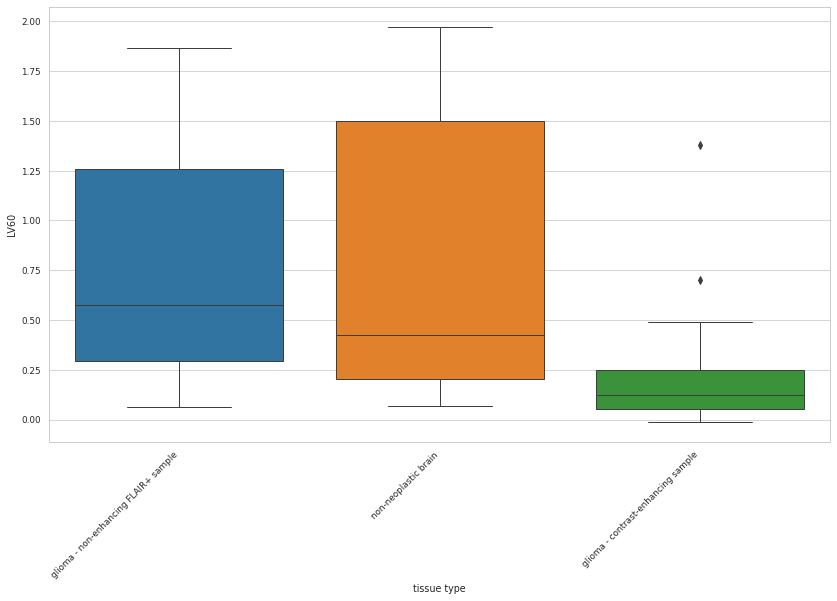

array(['SRP051844', 'SRP058181', 'SRP019762', 'SRP057196', 'SRP029889',
       'SRP048683', 'SRP045900', 'SRP009144', 'SRP002274', 'SRP040622',
       'SRP028336', 'SRP032539', 'SRP058351', 'SRP017933', 'SRP033725',
       'SRP007483', 'SRP032540', 'SRP056477', 'SRP007494', 'SRP015668',
       'SRP033464'], dtype=object)

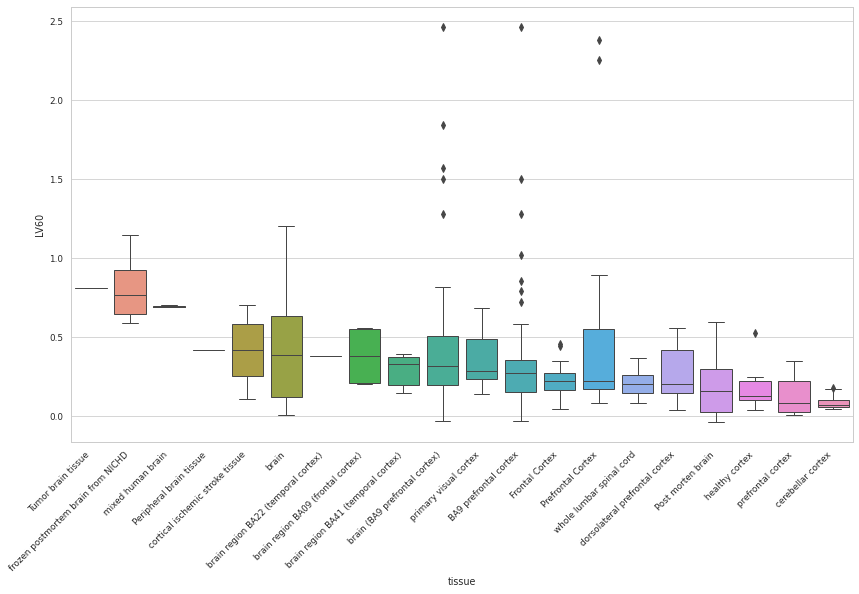

array(['SRP064454'], dtype=object)

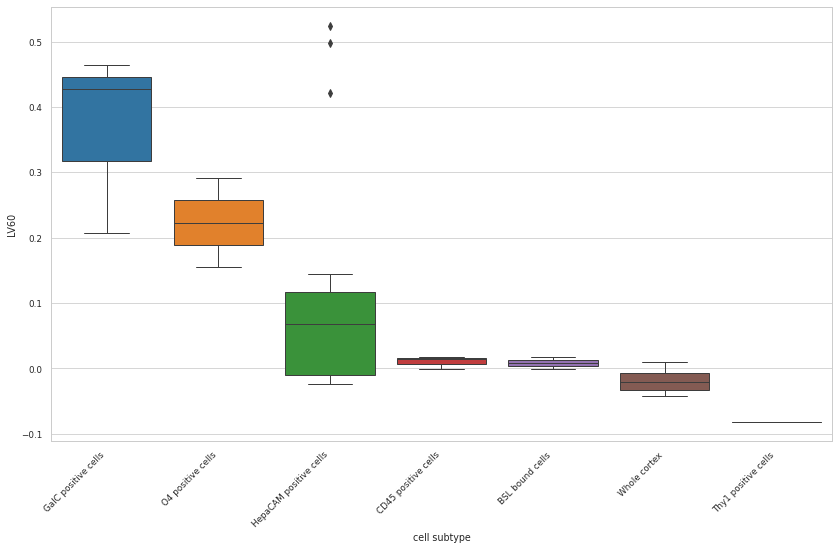

array(['SRP057196', 'SRP042161', 'SRP064454', 'SRP007494'], dtype=object)

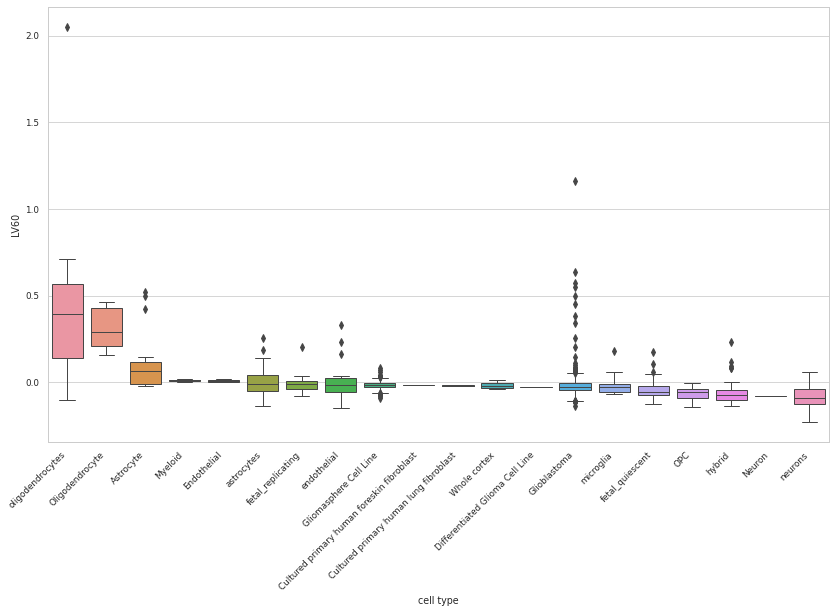

,pathway,LV index,AUC,p-value,FDR
2006,REACTOME_FORMATION_OF_THE_TERNARY_COMPLEX_AND_...,905,0.903435,1.326407e-06,2.345131e-05
2007,MIPS_NOP56P_ASSOCIATED_PRE_RRNA_COMPLEX,905,0.825748,1.686986e-08,4.331938e-07
2008,REACTOME_TRANSLATION,905,0.776626,6.146072e-09,1.657135e-07


SRP027358, SRP055569, SRP067661, SRP041885, SRP062025, SRP033135, SRP042616, SRP050499, SRP051102, SRP015138, SRP056295, SRP050146, SRP051765, SRP046233, SRP028594, SRP055390, SRP055103, SRP048759, SRP056074, SRP033266, SRP058719, SRP042161, SRP049063, SRP056197, SRP042043, SRP047323, 

''

20003_1141168684-Treatmentmedication_code_xenical_120mg_capsule                 3.418248
22617_9223-Job_SOC_coding_Kitchen_and_catering_assistants                       3.307585
20003_1140875392-Treatmentmedication_code_plaquenil_200mg_tablet                3.270236
20532-Did_your_sleep_change                                                     3.261277
mumps virus infectious disease                                                  3.200741
M13_MEDIALEPICOND-Medial_epicondylitis                                          3.189440
20003_1140862148-Treatmentmedication_code_serevent_25mcg_inhaler                2.982263
5855_3-Which_eyes_affected_by_astigmatism_Both_eyes                             2.957668
periodontitis                                                                   2.954612
salivary gland neoplasm                                                         2.935215
22617_2122-Job_SOC_coding_Mechanical_engineers                                  2.934610
L12_DERM_NAS-Other_an

''

,gene_name,LV905,gene_band
0,EEF1A1,3.320744,6q13
1,SH3D19,2.601119,4q31.3
2,CRHBP,2.472517,5q13.3
3,EEF1G,2.459130,11q12.3
4,EIF4B,2.435901,12q13.13
5,RPL7A,2.364714,9q34.2
6,EIF3E,2.323376,8q23.1
7,RPS6,2.257026,9p22.1
8,HNRNPA1,2.234257,12q13.13
9,RPL10A,2.212582,6p21.31


tissue            0.023775
cell type         0.015259
cell phenotype    0.009122
dtype: float64

array(['SRP027358', 'SRP067661', 'SRP062025', 'SRP056295', 'SRP028594',
       'SRP055390', 'SRP048759', 'SRP033266', 'SRP058719', 'SRP049063',
       'SRP056197', 'SRP047323'], dtype=object)

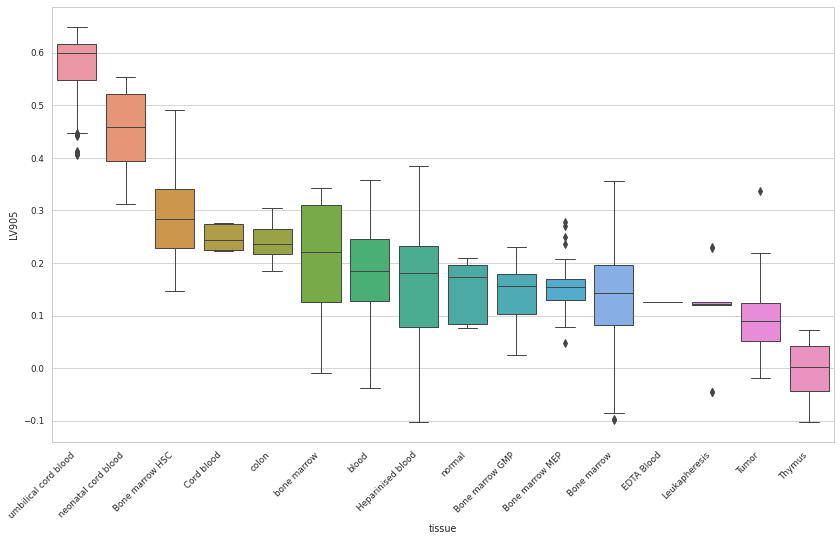

array(['SRP055569', 'SRP067661', 'SRP041885', 'SRP033135', 'SRP051102',
       'SRP015138', 'SRP056295', 'SRP050146', 'SRP051765', 'SRP046233',
       'SRP055390', 'SRP055103', 'SRP048759', 'SRP033266', 'SRP042161',
       'SRP049063', 'SRP056197', 'SRP047323'], dtype=object)

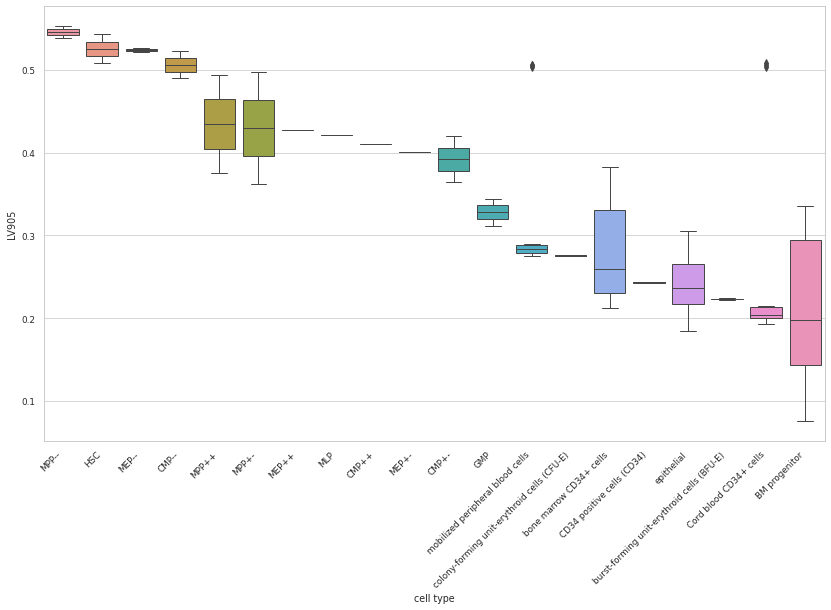

array(['SRP062025'], dtype=object)

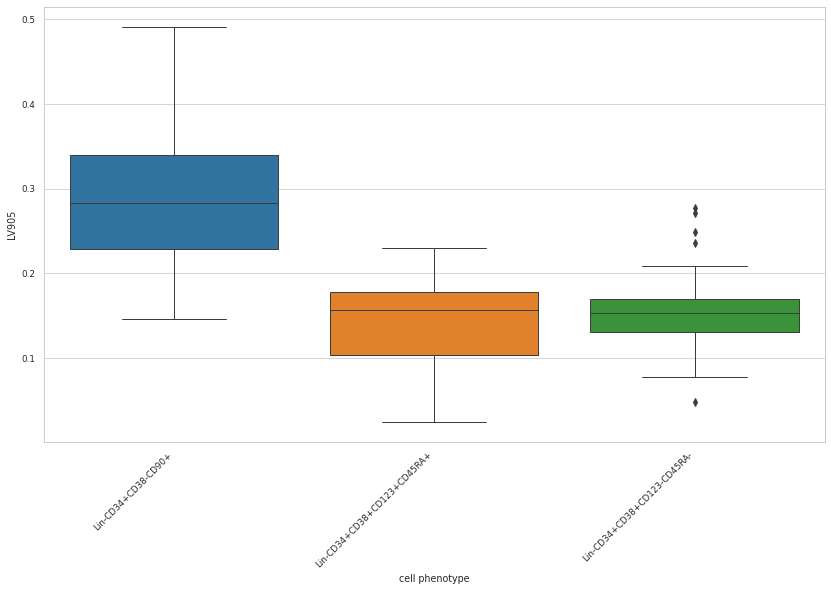

In [22]:
for lv_name in lvs_list:
    display(HTML(f"<h2>{lv_name}</h2>"))

    #     lv_name = lv_info["name"]
    lv_obj = LVAnalysis(lv_name, data)

    # show lv prior knowledge match (pathways)
    lv_pathways = multiplier_model_summary[
        multiplier_model_summary["LV index"].isin((lv_name[2:],))
        & (
            (multiplier_model_summary["FDR"] < 0.05)
            | (multiplier_model_summary["AUC"] >= 0.75)
        )
    ]
    display(lv_pathways)

    lv_data = lv_obj.get_experiments_data()

    display("")
    display(lv_obj.lv_traits.head(20))
    display("")
    display(lv_obj.lv_genes.head(10))

    lv_attrs = lv_obj.get_attributes_variation_score()
    _tmp = pd.Series(lv_attrs.index)
    lv_attrs = lv_attrs[
        _tmp.str.match(
            "(?:cell.+type$)|(?:tissue$)|(?:tissue.+type$)",
            case=False,
            flags=re.IGNORECASE,
        ).values
    ].sort_values(ascending=False)
    display(lv_attrs)

    for _lva in lv_attrs.index:
        display(HTML(f"<h3>{_lva}</h3>"))
        display(lv_data[_lva].dropna().reset_index()["project"].unique())

        with sns.plotting_context("paper", font_scale=1.0), sns.axes_style("whitegrid"):
            fig, ax = plt.subplots(figsize=(14, 8))
            ax = lv_obj.plot_attribute(_lva, top_x_values=20)
            if ax is None:
                plt.close(fig)
                continue
            display(fig)
            plt.close(fig)